In [123]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
from sklearn.preprocessing import MinMaxScaler

In [31]:
# data frame
df = pd.read_csv('../csv/GBPUSD.csv', header=1)
df = df.rename(columns={"Unnamed: 0":"date", "last_price":"close"})

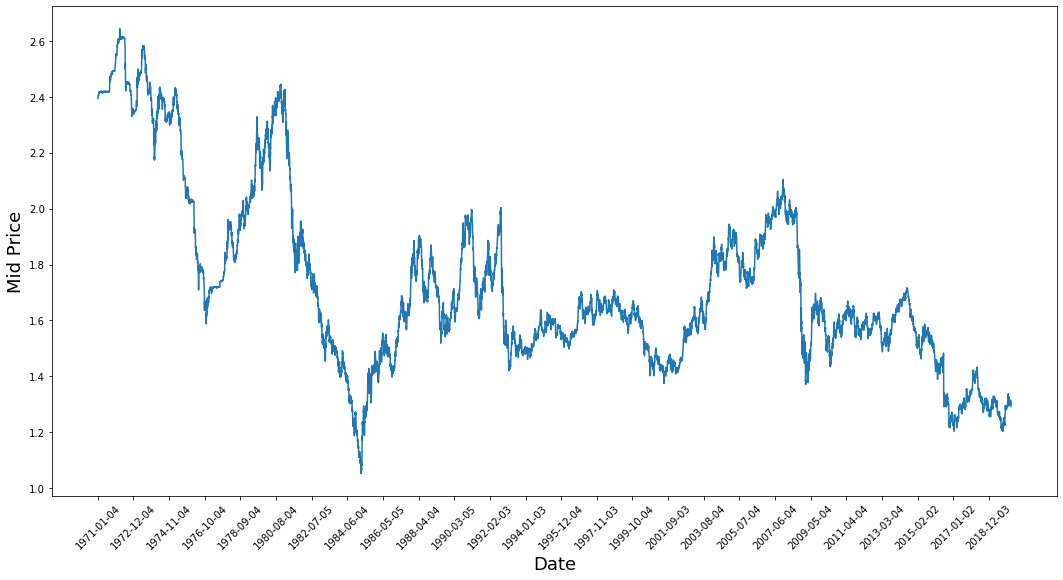

In [35]:
plt.figure(figsize = (18,9))
# plot mid price
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [44]:
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

(11000, 1)


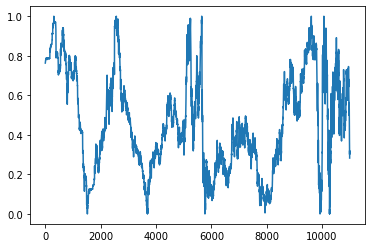

In [72]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

plt.plot(train_data)
print(train_data.shape)

In [73]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

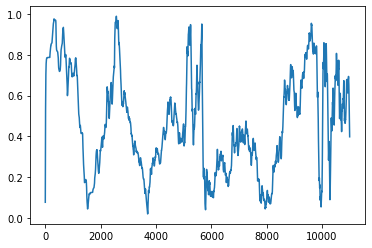

In [107]:
plt.plot(train_data)
train_data = train_data.reshape(11000, 1)

In [115]:
generator = TimeseriesGenerator(train_data, train_data, length=30, batch_size=1)
print(len(generator))

10970


In [124]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=20, return_sequences=False, activation='relu', input_shape=(30, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

model.fit_generator(generator, steps_per_epoch=1, epochs=10970, verbose=2)

Epoch 1/10970
1/1 - 3s - loss: 0.6994
Epoch 2/10970
1/1 - 0s - loss: 0.4269
Epoch 3/10970
1/1 - 0s - loss: 0.5276
Epoch 4/10970
1/1 - 0s - loss: 0.2308
Epoch 5/10970
1/1 - 0s - loss: 0.5008
Epoch 6/10970
1/1 - 0s - loss: 0.1900
Epoch 7/10970
1/1 - 0s - loss: 0.5426
Epoch 8/10970
1/1 - 0s - loss: 0.2173
Epoch 9/10970
1/1 - 0s - loss: 0.5261
Epoch 10/10970
1/1 - 0s - loss: 0.5130
Epoch 11/10970
1/1 - 0s - loss: 0.2383
Epoch 12/10970
1/1 - 0s - loss: 0.1713
Epoch 13/10970
1/1 - 0s - loss: 0.0608
Epoch 14/10970
1/1 - 0s - loss: 0.2020
Epoch 15/10970
1/1 - 0s - loss: 0.1113
Epoch 16/10970
1/1 - 0s - loss: 0.4995
Epoch 17/10970
1/1 - 0s - loss: 0.1662
Epoch 18/10970
1/1 - 0s - loss: 0.4290
Epoch 19/10970
1/1 - 0s - loss: 0.1077
Epoch 20/10970
1/1 - 0s - loss: 0.3213
Epoch 21/10970
1/1 - 0s - loss: 0.0025
Epoch 22/10970
1/1 - 0s - loss: 0.0627
Epoch 23/10970
1/1 - 0s - loss: 0.0435
Epoch 24/10970
1/1 - 0s - loss: 0.4206
Epoch 25/10970
1/1 - 0s - loss: 0.3135
Epoch 26/10970
1/1 - 0s - loss: 0.

1/1 - 0s - loss: 0.0475
Epoch 209/10970
1/1 - 0s - loss: 0.0141
Epoch 210/10970
1/1 - 0s - loss: 0.0360
Epoch 211/10970
1/1 - 0s - loss: 0.0096
Epoch 212/10970
1/1 - 0s - loss: 0.0393
Epoch 213/10970
1/1 - 0s - loss: 0.0153
Epoch 214/10970
1/1 - 0s - loss: 0.0216
Epoch 215/10970
1/1 - 0s - loss: 0.0078
Epoch 216/10970
1/1 - 0s - loss: 0.0519
Epoch 217/10970
1/1 - 0s - loss: 7.6842e-04
Epoch 218/10970
1/1 - 0s - loss: 0.0034
Epoch 219/10970
1/1 - 0s - loss: 0.0171
Epoch 220/10970
1/1 - 0s - loss: 0.0184
Epoch 221/10970
1/1 - 0s - loss: 0.0254
Epoch 222/10970
1/1 - 0s - loss: 0.0192
Epoch 223/10970
1/1 - 0s - loss: 0.0109
Epoch 224/10970
1/1 - 0s - loss: 0.0025
Epoch 225/10970
1/1 - 0s - loss: 0.0587
Epoch 226/10970
1/1 - 0s - loss: 0.0487
Epoch 227/10970
1/1 - 0s - loss: 0.0459
Epoch 228/10970
1/1 - 0s - loss: 0.0313
Epoch 229/10970
1/1 - 0s - loss: 0.0436
Epoch 230/10970
1/1 - 0s - loss: 0.1026
Epoch 231/10970
1/1 - 0s - loss: 0.0406
Epoch 232/10970
1/1 - 0s - loss: 0.0345
Epoch 233/10

Epoch 413/10970
1/1 - 0s - loss: 0.0432
Epoch 414/10970
1/1 - 0s - loss: 0.0274
Epoch 415/10970
1/1 - 0s - loss: 0.0043
Epoch 416/10970
1/1 - 0s - loss: 0.0126
Epoch 417/10970
1/1 - 0s - loss: 0.0166
Epoch 418/10970
1/1 - 0s - loss: 0.0070
Epoch 419/10970
1/1 - 0s - loss: 0.0032
Epoch 420/10970
1/1 - 0s - loss: 0.0029
Epoch 421/10970
1/1 - 0s - loss: 0.0290
Epoch 422/10970
1/1 - 0s - loss: 0.0382
Epoch 423/10970
1/1 - 0s - loss: 0.0543
Epoch 424/10970
1/1 - 0s - loss: 0.0114
Epoch 425/10970
1/1 - 0s - loss: 0.0079
Epoch 426/10970
1/1 - 0s - loss: 0.0179
Epoch 427/10970
1/1 - 0s - loss: 0.0131
Epoch 428/10970
1/1 - 0s - loss: 0.0257
Epoch 429/10970
1/1 - 0s - loss: 0.0033
Epoch 430/10970
1/1 - 0s - loss: 2.9325e-05
Epoch 431/10970
1/1 - 0s - loss: 0.0421
Epoch 432/10970
1/1 - 0s - loss: 0.0309
Epoch 433/10970
1/1 - 0s - loss: 0.0496
Epoch 434/10970
1/1 - 0s - loss: 0.0543
Epoch 435/10970
1/1 - 0s - loss: 0.0280
Epoch 436/10970
1/1 - 0s - loss: 4.0373e-04
Epoch 437/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0369
Epoch 618/10970
1/1 - 0s - loss: 0.0208
Epoch 619/10970
1/1 - 0s - loss: 0.0798
Epoch 620/10970
1/1 - 0s - loss: 0.0132
Epoch 621/10970
1/1 - 0s - loss: 0.0216
Epoch 622/10970
1/1 - 0s - loss: 0.0430
Epoch 623/10970
1/1 - 0s - loss: 0.0095
Epoch 624/10970
1/1 - 0s - loss: 0.0061
Epoch 625/10970
1/1 - 0s - loss: 0.0160
Epoch 626/10970
1/1 - 0s - loss: 0.0328
Epoch 627/10970
1/1 - 0s - loss: 0.0146
Epoch 628/10970
1/1 - 0s - loss: 0.0198
Epoch 629/10970
1/1 - 0s - loss: 0.0126
Epoch 630/10970
1/1 - 0s - loss: 0.0427
Epoch 631/10970
1/1 - 0s - loss: 0.0242
Epoch 632/10970
1/1 - 0s - loss: 0.0433
Epoch 633/10970
1/1 - 0s - loss: 0.0236
Epoch 634/10970
1/1 - 0s - loss: 8.6576e-04
Epoch 635/10970
1/1 - 0s - loss: 0.0196
Epoch 636/10970
1/1 - 0s - loss: 0.0390
Epoch 637/10970
1/1 - 0s - loss: 0.0113
Epoch 638/10970
1/1 - 0s - loss: 0.0098
Epoch 639/10970
1/1 - 0s - loss: 0.0126
Epoch 640/10970
1/1 - 0s - loss: 0.0031
Epoch 641/10970
1/1 - 0s - loss: 9.9012e-04
Epoch 64

1/1 - 0s - loss: 0.0149
Epoch 822/10970
1/1 - 0s - loss: 0.0048
Epoch 823/10970
1/1 - 0s - loss: 0.0217
Epoch 824/10970
1/1 - 0s - loss: 0.0069
Epoch 825/10970
1/1 - 0s - loss: 0.0053
Epoch 826/10970
1/1 - 0s - loss: 0.0419
Epoch 827/10970
1/1 - 0s - loss: 0.0051
Epoch 828/10970
1/1 - 0s - loss: 0.0011
Epoch 829/10970
1/1 - 0s - loss: 0.0107
Epoch 830/10970
1/1 - 0s - loss: 0.0038
Epoch 831/10970
1/1 - 0s - loss: 0.0102
Epoch 832/10970
1/1 - 0s - loss: 0.0123
Epoch 833/10970
1/1 - 0s - loss: 0.0039
Epoch 834/10970
1/1 - 0s - loss: 0.0224
Epoch 835/10970
1/1 - 0s - loss: 0.0119
Epoch 836/10970
1/1 - 0s - loss: 0.0242
Epoch 837/10970
1/1 - 0s - loss: 0.0098
Epoch 838/10970
1/1 - 0s - loss: 0.0104
Epoch 839/10970
1/1 - 0s - loss: 0.0220
Epoch 840/10970
1/1 - 0s - loss: 0.0286
Epoch 841/10970
1/1 - 0s - loss: 1.8898e-04
Epoch 842/10970
1/1 - 1s - loss: 0.0116
Epoch 843/10970
1/1 - 0s - loss: 0.0200
Epoch 844/10970
1/1 - 0s - loss: 8.5151e-04
Epoch 845/10970
1/1 - 0s - loss: 0.0463
Epoch 84

1/1 - 0s - loss: 1.4359e-04
Epoch 1025/10970
1/1 - 0s - loss: 0.0140
Epoch 1026/10970
1/1 - 0s - loss: 0.0077
Epoch 1027/10970
1/1 - 0s - loss: 0.0246
Epoch 1028/10970
1/1 - 0s - loss: 0.0081
Epoch 1029/10970
1/1 - 0s - loss: 0.0019
Epoch 1030/10970
1/1 - 0s - loss: 0.0011
Epoch 1031/10970
1/1 - 0s - loss: 0.0015
Epoch 1032/10970
1/1 - 0s - loss: 0.0081
Epoch 1033/10970
1/1 - 0s - loss: 0.0039
Epoch 1034/10970
1/1 - 0s - loss: 0.0043
Epoch 1035/10970
1/1 - 0s - loss: 0.0096
Epoch 1036/10970
1/1 - 0s - loss: 0.0081
Epoch 1037/10970
1/1 - 0s - loss: 0.0085
Epoch 1038/10970
1/1 - 0s - loss: 0.0142
Epoch 1039/10970
1/1 - 0s - loss: 0.0082
Epoch 1040/10970
1/1 - 0s - loss: 0.0504
Epoch 1041/10970
1/1 - 0s - loss: 9.0480e-04
Epoch 1042/10970
1/1 - 0s - loss: 0.0103
Epoch 1043/10970
1/1 - 0s - loss: 0.0178
Epoch 1044/10970
1/1 - 0s - loss: 0.0197
Epoch 1045/10970
1/1 - 0s - loss: 0.0266
Epoch 1046/10970
1/1 - 0s - loss: 0.0039
Epoch 1047/10970
1/1 - 0s - loss: 0.0061
Epoch 1048/10970
1/1 - 0s

1/1 - 0s - loss: 0.0076
Epoch 1224/10970
1/1 - 0s - loss: 0.0048
Epoch 1225/10970
1/1 - 0s - loss: 0.0090
Epoch 1226/10970
1/1 - 0s - loss: 0.0315
Epoch 1227/10970
1/1 - 0s - loss: 0.0151
Epoch 1228/10970
1/1 - 0s - loss: 0.0126
Epoch 1229/10970
1/1 - 0s - loss: 0.0045
Epoch 1230/10970
1/1 - 0s - loss: 0.0020
Epoch 1231/10970
1/1 - 0s - loss: 0.0294
Epoch 1232/10970
1/1 - 0s - loss: 0.0226
Epoch 1233/10970
1/1 - 0s - loss: 0.0106
Epoch 1234/10970
1/1 - 0s - loss: 0.0167
Epoch 1235/10970
1/1 - 0s - loss: 0.0123
Epoch 1236/10970
1/1 - 0s - loss: 0.0088
Epoch 1237/10970
1/1 - 0s - loss: 0.0099
Epoch 1238/10970
1/1 - 0s - loss: 0.0121
Epoch 1239/10970
1/1 - 0s - loss: 0.0044
Epoch 1240/10970
1/1 - 0s - loss: 0.0257
Epoch 1241/10970
1/1 - 0s - loss: 0.0115
Epoch 1242/10970
1/1 - 0s - loss: 0.0046
Epoch 1243/10970
1/1 - 0s - loss: 0.0031
Epoch 1244/10970
1/1 - 0s - loss: 0.0213
Epoch 1245/10970
1/1 - 0s - loss: 0.0038
Epoch 1246/10970
1/1 - 0s - loss: 0.0170
Epoch 1247/10970
1/1 - 0s - loss:

Epoch 1423/10970
1/1 - 0s - loss: 0.0165
Epoch 1424/10970
1/1 - 0s - loss: 0.0029
Epoch 1425/10970
1/1 - 0s - loss: 0.0132
Epoch 1426/10970
1/1 - 0s - loss: 0.0010
Epoch 1427/10970
1/1 - 0s - loss: 0.0349
Epoch 1428/10970
1/1 - 0s - loss: 0.0351
Epoch 1429/10970
1/1 - 0s - loss: 0.0194
Epoch 1430/10970
1/1 - 0s - loss: 0.0278
Epoch 1431/10970
1/1 - 0s - loss: 0.0153
Epoch 1432/10970
1/1 - 0s - loss: 0.0050
Epoch 1433/10970
1/1 - 0s - loss: 0.0166
Epoch 1434/10970
1/1 - 0s - loss: 0.0263
Epoch 1435/10970
1/1 - 0s - loss: 0.0265
Epoch 1436/10970
1/1 - 0s - loss: 0.0116
Epoch 1437/10970
1/1 - 0s - loss: 0.0048
Epoch 1438/10970
1/1 - 0s - loss: 0.0247
Epoch 1439/10970
1/1 - 0s - loss: 0.0265
Epoch 1440/10970
1/1 - 0s - loss: 0.0196
Epoch 1441/10970
1/1 - 0s - loss: 0.0325
Epoch 1442/10970
1/1 - 0s - loss: 0.0171
Epoch 1443/10970
1/1 - 0s - loss: 0.0251
Epoch 1444/10970
1/1 - 0s - loss: 0.0153
Epoch 1445/10970
1/1 - 0s - loss: 0.0352
Epoch 1446/10970
1/1 - 0s - loss: 0.0397
Epoch 1447/10970

Epoch 1622/10970
1/1 - 0s - loss: 0.0024
Epoch 1623/10970
1/1 - 0s - loss: 0.0081
Epoch 1624/10970
1/1 - 0s - loss: 0.0050
Epoch 1625/10970
1/1 - 0s - loss: 0.0074
Epoch 1626/10970
1/1 - 0s - loss: 0.0046
Epoch 1627/10970
1/1 - 0s - loss: 0.0118
Epoch 1628/10970
1/1 - 0s - loss: 0.0063
Epoch 1629/10970
1/1 - 0s - loss: 0.0072
Epoch 1630/10970
1/1 - 0s - loss: 0.0026
Epoch 1631/10970
1/1 - 0s - loss: 0.0138
Epoch 1632/10970
1/1 - 0s - loss: 0.0197
Epoch 1633/10970
1/1 - 0s - loss: 0.0292
Epoch 1634/10970
1/1 - 0s - loss: 0.0035
Epoch 1635/10970
1/1 - 0s - loss: 0.0450
Epoch 1636/10970
1/1 - 0s - loss: 0.0064
Epoch 1637/10970
1/1 - 0s - loss: 4.7603e-04
Epoch 1638/10970
1/1 - 0s - loss: 0.0122
Epoch 1639/10970
1/1 - 0s - loss: 0.0017
Epoch 1640/10970
1/1 - 0s - loss: 0.0069
Epoch 1641/10970
1/1 - 0s - loss: 0.0225
Epoch 1642/10970
1/1 - 0s - loss: 0.0117
Epoch 1643/10970
1/1 - 0s - loss: 0.0208
Epoch 1644/10970
1/1 - 0s - loss: 0.0177
Epoch 1645/10970
1/1 - 0s - loss: 0.0095
Epoch 1646/1

Epoch 1821/10970
1/1 - 0s - loss: 0.0012
Epoch 1822/10970
1/1 - 0s - loss: 0.0021
Epoch 1823/10970
1/1 - 0s - loss: 0.0241
Epoch 1824/10970
1/1 - 0s - loss: 0.0035
Epoch 1825/10970
1/1 - 0s - loss: 0.0055
Epoch 1826/10970
1/1 - 0s - loss: 0.0093
Epoch 1827/10970
1/1 - 0s - loss: 0.0042
Epoch 1828/10970
1/1 - 0s - loss: 0.0085
Epoch 1829/10970
1/1 - 0s - loss: 0.0040
Epoch 1830/10970
1/1 - 0s - loss: 0.0048
Epoch 1831/10970
1/1 - 0s - loss: 0.0025
Epoch 1832/10970
1/1 - 0s - loss: 3.1796e-04
Epoch 1833/10970
1/1 - 0s - loss: 0.0067
Epoch 1834/10970
1/1 - 0s - loss: 0.0152
Epoch 1835/10970
1/1 - 0s - loss: 0.0094
Epoch 1836/10970
1/1 - 0s - loss: 0.0073
Epoch 1837/10970
1/1 - 0s - loss: 0.0066
Epoch 1838/10970
1/1 - 0s - loss: 0.0177
Epoch 1839/10970
1/1 - 0s - loss: 0.0065
Epoch 1840/10970
1/1 - 0s - loss: 0.0101
Epoch 1841/10970
1/1 - 0s - loss: 7.7415e-04
Epoch 1842/10970
1/1 - 0s - loss: 0.0192
Epoch 1843/10970
1/1 - 0s - loss: 0.0022
Epoch 1844/10970
1/1 - 0s - loss: 0.0069
Epoch 18

1/1 - 0s - loss: 0.0034
Epoch 2020/10970
1/1 - 0s - loss: 0.0057
Epoch 2021/10970
1/1 - 0s - loss: 0.0055
Epoch 2022/10970
1/1 - 0s - loss: 0.0016
Epoch 2023/10970
1/1 - 0s - loss: 5.9488e-04
Epoch 2024/10970
1/1 - 0s - loss: 0.0138
Epoch 2025/10970
1/1 - 0s - loss: 0.0105
Epoch 2026/10970
1/1 - 0s - loss: 0.0191
Epoch 2027/10970
1/1 - 0s - loss: 0.0011
Epoch 2028/10970
1/1 - 0s - loss: 0.0026
Epoch 2029/10970
1/1 - 0s - loss: 0.0097
Epoch 2030/10970
1/1 - 0s - loss: 0.0128
Epoch 2031/10970
1/1 - 0s - loss: 0.0049
Epoch 2032/10970
1/1 - 0s - loss: 0.0057
Epoch 2033/10970
1/1 - 0s - loss: 0.0057
Epoch 2034/10970
1/1 - 0s - loss: 0.0045
Epoch 2035/10970
1/1 - 0s - loss: 0.0877
Epoch 2036/10970
1/1 - 0s - loss: 0.0148
Epoch 2037/10970
1/1 - 0s - loss: 0.0199
Epoch 2038/10970
1/1 - 0s - loss: 8.0508e-04
Epoch 2039/10970
1/1 - 0s - loss: 0.0030
Epoch 2040/10970
1/1 - 0s - loss: 0.0091
Epoch 2041/10970
1/1 - 0s - loss: 0.0074
Epoch 2042/10970
1/1 - 0s - loss: 0.0201
Epoch 2043/10970
1/1 - 0s

Epoch 2218/10970
1/1 - 0s - loss: 0.0038
Epoch 2219/10970
1/1 - 0s - loss: 0.0114
Epoch 2220/10970
1/1 - 0s - loss: 0.0138
Epoch 2221/10970
1/1 - 0s - loss: 0.0120
Epoch 2222/10970
1/1 - 0s - loss: 0.0016
Epoch 2223/10970
1/1 - 0s - loss: 0.0099
Epoch 2224/10970
1/1 - 0s - loss: 0.0077
Epoch 2225/10970
1/1 - 0s - loss: 0.0018
Epoch 2226/10970
1/1 - 0s - loss: 0.0102
Epoch 2227/10970
1/1 - 0s - loss: 0.0115
Epoch 2228/10970
1/1 - 0s - loss: 0.0153
Epoch 2229/10970
1/1 - 0s - loss: 0.0024
Epoch 2230/10970
1/1 - 0s - loss: 0.0084
Epoch 2231/10970
1/1 - 0s - loss: 0.0028
Epoch 2232/10970
1/1 - 0s - loss: 0.0169
Epoch 2233/10970
1/1 - 0s - loss: 0.0141
Epoch 2234/10970
1/1 - 0s - loss: 0.0063
Epoch 2235/10970
1/1 - 0s - loss: 0.0063
Epoch 2236/10970
1/1 - 0s - loss: 0.0169
Epoch 2237/10970
1/1 - 0s - loss: 0.0039
Epoch 2238/10970
1/1 - 0s - loss: 0.0294
Epoch 2239/10970
1/1 - 0s - loss: 0.0063
Epoch 2240/10970
1/1 - 0s - loss: 0.0029
Epoch 2241/10970
1/1 - 0s - loss: 0.0164
Epoch 2242/10970

1/1 - 0s - loss: 0.0266
Epoch 2417/10970
1/1 - 0s - loss: 0.0197
Epoch 2418/10970
1/1 - 0s - loss: 0.0076
Epoch 2419/10970
1/1 - 0s - loss: 0.0030
Epoch 2420/10970
1/1 - 0s - loss: 0.0015
Epoch 2421/10970
1/1 - 0s - loss: 0.0089
Epoch 2422/10970
1/1 - 0s - loss: 0.0017
Epoch 2423/10970
1/1 - 0s - loss: 0.0112
Epoch 2424/10970
1/1 - 0s - loss: 0.0478
Epoch 2425/10970
1/1 - 0s - loss: 0.0014
Epoch 2426/10970
1/1 - 0s - loss: 0.0164
Epoch 2427/10970
1/1 - 0s - loss: 0.0478
Epoch 2428/10970
1/1 - 0s - loss: 0.0085
Epoch 2429/10970
1/1 - 0s - loss: 0.0194
Epoch 2430/10970
1/1 - 0s - loss: 0.0068
Epoch 2431/10970
1/1 - 0s - loss: 0.0074
Epoch 2432/10970
1/1 - 0s - loss: 0.0149
Epoch 2433/10970
1/1 - 0s - loss: 0.0096
Epoch 2434/10970
1/1 - 0s - loss: 0.0264
Epoch 2435/10970
1/1 - 0s - loss: 0.0231
Epoch 2436/10970
1/1 - 0s - loss: 0.0325
Epoch 2437/10970
1/1 - 0s - loss: 0.0134
Epoch 2438/10970
1/1 - 0s - loss: 0.0195
Epoch 2439/10970
1/1 - 0s - loss: 0.0152
Epoch 2440/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0225
Epoch 2616/10970
1/1 - 0s - loss: 0.0022
Epoch 2617/10970
1/1 - 0s - loss: 0.0074
Epoch 2618/10970
1/1 - 0s - loss: 0.0056
Epoch 2619/10970
1/1 - 0s - loss: 0.0047
Epoch 2620/10970
1/1 - 0s - loss: 6.1348e-04
Epoch 2621/10970
1/1 - 0s - loss: 0.0042
Epoch 2622/10970
1/1 - 0s - loss: 0.0324
Epoch 2623/10970
1/1 - 0s - loss: 0.0068
Epoch 2624/10970
1/1 - 0s - loss: 0.0175
Epoch 2625/10970
1/1 - 0s - loss: 0.0045
Epoch 2626/10970
1/1 - 0s - loss: 0.0071
Epoch 2627/10970
1/1 - 0s - loss: 0.0064
Epoch 2628/10970
1/1 - 0s - loss: 0.0105
Epoch 2629/10970
1/1 - 0s - loss: 0.0070
Epoch 2630/10970
1/1 - 0s - loss: 0.0094
Epoch 2631/10970
1/1 - 0s - loss: 0.0171
Epoch 2632/10970
1/1 - 0s - loss: 0.0250
Epoch 2633/10970
1/1 - 0s - loss: 0.0207
Epoch 2634/10970
1/1 - 0s - loss: 0.0162
Epoch 2635/10970
1/1 - 0s - loss: 0.0077
Epoch 2636/10970
1/1 - 0s - loss: 0.0052
Epoch 2637/10970
1/1 - 0s - loss: 8.5726e-04
Epoch 2638/10970
1/1 - 0s - loss: 0.0108
Epoch 2639/10970
1/1 - 0s

Epoch 2814/10970
1/1 - 0s - loss: 0.0061
Epoch 2815/10970
1/1 - 0s - loss: 0.0021
Epoch 2816/10970
1/1 - 0s - loss: 0.0018
Epoch 2817/10970
1/1 - 0s - loss: 0.0065
Epoch 2818/10970
1/1 - 0s - loss: 0.0020
Epoch 2819/10970
1/1 - 0s - loss: 0.0077
Epoch 2820/10970
1/1 - 0s - loss: 0.0158
Epoch 2821/10970
1/1 - 0s - loss: 0.0141
Epoch 2822/10970
1/1 - 0s - loss: 0.0102
Epoch 2823/10970
1/1 - 0s - loss: 0.0032
Epoch 2824/10970
1/1 - 0s - loss: 0.0110
Epoch 2825/10970
1/1 - 0s - loss: 0.0071
Epoch 2826/10970
1/1 - 0s - loss: 0.0129
Epoch 2827/10970
1/1 - 0s - loss: 0.0052
Epoch 2828/10970
1/1 - 0s - loss: 0.0236
Epoch 2829/10970
1/1 - 0s - loss: 0.0111
Epoch 2830/10970
1/1 - 0s - loss: 0.0048
Epoch 2831/10970
1/1 - 0s - loss: 0.0087
Epoch 2832/10970
1/1 - 0s - loss: 0.0016
Epoch 2833/10970
1/1 - 0s - loss: 0.0089
Epoch 2834/10970
1/1 - 0s - loss: 0.0091
Epoch 2835/10970
1/1 - 0s - loss: 0.0107
Epoch 2836/10970
1/1 - 0s - loss: 0.0156
Epoch 2837/10970
1/1 - 0s - loss: 0.0224
Epoch 2838/10970

Epoch 3012/10970
1/1 - 0s - loss: 0.0086
Epoch 3013/10970
1/1 - 0s - loss: 0.0132
Epoch 3014/10970
1/1 - 0s - loss: 0.0173
Epoch 3015/10970
1/1 - 0s - loss: 8.7997e-04
Epoch 3016/10970
1/1 - 0s - loss: 0.0152
Epoch 3017/10970
1/1 - 0s - loss: 0.0183
Epoch 3018/10970
1/1 - 0s - loss: 0.0199
Epoch 3019/10970
1/1 - 0s - loss: 0.0054
Epoch 3020/10970
1/1 - 0s - loss: 0.0097
Epoch 3021/10970
1/1 - 0s - loss: 0.0107
Epoch 3022/10970
1/1 - 0s - loss: 0.0186
Epoch 3023/10970
1/1 - 0s - loss: 0.0081
Epoch 3024/10970
1/1 - 0s - loss: 0.0123
Epoch 3025/10970
1/1 - 0s - loss: 0.0142
Epoch 3026/10970
1/1 - 0s - loss: 0.0075
Epoch 3027/10970
1/1 - 0s - loss: 0.0029
Epoch 3028/10970
1/1 - 0s - loss: 0.0058
Epoch 3029/10970
1/1 - 0s - loss: 0.0076
Epoch 3030/10970
1/1 - 0s - loss: 0.0288
Epoch 3031/10970
1/1 - 0s - loss: 0.0254
Epoch 3032/10970
1/1 - 0s - loss: 0.0553
Epoch 3033/10970
1/1 - 0s - loss: 0.0060
Epoch 3034/10970
1/1 - 0s - loss: 0.0085
Epoch 3035/10970
1/1 - 0s - loss: 0.0057
Epoch 3036/1

Epoch 3211/10970
1/1 - 0s - loss: 0.0021
Epoch 3212/10970
1/1 - 0s - loss: 0.0017
Epoch 3213/10970
1/1 - 0s - loss: 0.0077
Epoch 3214/10970
1/1 - 0s - loss: 0.0124
Epoch 3215/10970
1/1 - 0s - loss: 0.0052
Epoch 3216/10970
1/1 - 0s - loss: 0.0015
Epoch 3217/10970
1/1 - 0s - loss: 0.0076
Epoch 3218/10970
1/1 - 0s - loss: 0.0269
Epoch 3219/10970
1/1 - 0s - loss: 0.0065
Epoch 3220/10970
1/1 - 0s - loss: 0.0163
Epoch 3221/10970
1/1 - 0s - loss: 0.0082
Epoch 3222/10970
1/1 - 0s - loss: 0.0012
Epoch 3223/10970
1/1 - 0s - loss: 0.0077
Epoch 3224/10970
1/1 - 0s - loss: 0.0167
Epoch 3225/10970
1/1 - 0s - loss: 0.0119
Epoch 3226/10970
1/1 - 0s - loss: 0.0032
Epoch 3227/10970
1/1 - 0s - loss: 0.0016
Epoch 3228/10970
1/1 - 0s - loss: 0.0104
Epoch 3229/10970
1/1 - 0s - loss: 0.0055
Epoch 3230/10970
1/1 - 0s - loss: 0.0061
Epoch 3231/10970
1/1 - 0s - loss: 0.0158
Epoch 3232/10970
1/1 - 0s - loss: 0.0029
Epoch 3233/10970
1/1 - 0s - loss: 0.0056
Epoch 3234/10970
1/1 - 0s - loss: 0.0013
Epoch 3235/10970

Epoch 3410/10970
1/1 - 0s - loss: 0.0039
Epoch 3411/10970
1/1 - 0s - loss: 0.0034
Epoch 3412/10970
1/1 - 0s - loss: 3.7718e-04
Epoch 3413/10970
1/1 - 0s - loss: 0.0086
Epoch 3414/10970
1/1 - 0s - loss: 0.0071
Epoch 3415/10970
1/1 - 0s - loss: 0.0092
Epoch 3416/10970
1/1 - 0s - loss: 0.0148
Epoch 3417/10970
1/1 - 0s - loss: 0.0162
Epoch 3418/10970
1/1 - 0s - loss: 0.0104
Epoch 3419/10970
1/1 - 0s - loss: 0.0158
Epoch 3420/10970
1/1 - 0s - loss: 9.2620e-04
Epoch 3421/10970
1/1 - 0s - loss: 6.2291e-04
Epoch 3422/10970
1/1 - 0s - loss: 0.0038
Epoch 3423/10970
1/1 - 0s - loss: 0.0055
Epoch 3424/10970
1/1 - 0s - loss: 5.7334e-04
Epoch 3425/10970
1/1 - 0s - loss: 3.5626e-04
Epoch 3426/10970
1/1 - 0s - loss: 0.0144
Epoch 3427/10970
1/1 - 0s - loss: 0.0144
Epoch 3428/10970
1/1 - 0s - loss: 0.0150
Epoch 3429/10970
1/1 - 0s - loss: 0.0146
Epoch 3430/10970
1/1 - 0s - loss: 0.0126
Epoch 3431/10970
1/1 - 0s - loss: 6.0585e-04
Epoch 3432/10970
1/1 - 0s - loss: 0.0017
Epoch 3433/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0125
Epoch 3609/10970
1/1 - 0s - loss: 0.0114
Epoch 3610/10970
1/1 - 0s - loss: 0.0064
Epoch 3611/10970
1/1 - 0s - loss: 0.0101
Epoch 3612/10970
1/1 - 0s - loss: 0.0014
Epoch 3613/10970
1/1 - 0s - loss: 0.0234
Epoch 3614/10970
1/1 - 0s - loss: 0.0124
Epoch 3615/10970
1/1 - 0s - loss: 0.0049
Epoch 3616/10970
1/1 - 0s - loss: 0.0061
Epoch 3617/10970
1/1 - 0s - loss: 0.0047
Epoch 3618/10970
1/1 - 0s - loss: 0.0230
Epoch 3619/10970
1/1 - 0s - loss: 0.0037
Epoch 3620/10970
1/1 - 0s - loss: 0.0077
Epoch 3621/10970
1/1 - 0s - loss: 0.0125
Epoch 3622/10970
1/1 - 0s - loss: 0.0072
Epoch 3623/10970
1/1 - 0s - loss: 0.0041
Epoch 3624/10970
1/1 - 0s - loss: 0.0080
Epoch 3625/10970
1/1 - 0s - loss: 0.0062
Epoch 3626/10970
1/1 - 0s - loss: 5.4300e-04
Epoch 3627/10970
1/1 - 0s - loss: 0.0057
Epoch 3628/10970
1/1 - 0s - loss: 0.0014
Epoch 3629/10970
1/1 - 0s - loss: 0.0163
Epoch 3630/10970
1/1 - 0s - loss: 0.0093
Epoch 3631/10970
1/1 - 0s - loss: 0.0045
Epoch 3632/10970
1/1 - 0s - l

Epoch 3807/10970
1/1 - 0s - loss: 0.0053
Epoch 3808/10970
1/1 - 0s - loss: 0.0060
Epoch 3809/10970
1/1 - 0s - loss: 0.0070
Epoch 3810/10970
1/1 - 0s - loss: 0.0053
Epoch 3811/10970
1/1 - 0s - loss: 0.0050
Epoch 3812/10970
1/1 - 0s - loss: 0.0012
Epoch 3813/10970
1/1 - 0s - loss: 7.9280e-04
Epoch 3814/10970
1/1 - 0s - loss: 6.1393e-05
Epoch 3815/10970
1/1 - 0s - loss: 0.0027
Epoch 3816/10970
1/1 - 0s - loss: 0.0175
Epoch 3817/10970
1/1 - 0s - loss: 0.0023
Epoch 3818/10970
1/1 - 0s - loss: 4.2054e-04
Epoch 3819/10970
1/1 - 0s - loss: 5.9302e-04
Epoch 3820/10970
1/1 - 0s - loss: 0.0157
Epoch 3821/10970
1/1 - 0s - loss: 0.0091
Epoch 3822/10970
1/1 - 0s - loss: 0.0094
Epoch 3823/10970
1/1 - 0s - loss: 0.0061
Epoch 3824/10970
1/1 - 0s - loss: 0.0012
Epoch 3825/10970
1/1 - 0s - loss: 0.0063
Epoch 3826/10970
1/1 - 0s - loss: 0.0171
Epoch 3827/10970
1/1 - 0s - loss: 0.0123
Epoch 3828/10970
1/1 - 0s - loss: 0.0183
Epoch 3829/10970
1/1 - 0s - loss: 3.9530e-04
Epoch 3830/10970
1/1 - 0s - loss: 0.0

1/1 - 0s - loss: 0.0351
Epoch 4006/10970
1/1 - 0s - loss: 0.0111
Epoch 4007/10970
1/1 - 0s - loss: 0.0062
Epoch 4008/10970
1/1 - 0s - loss: 0.0048
Epoch 4009/10970
1/1 - 0s - loss: 0.0111
Epoch 4010/10970
1/1 - 0s - loss: 0.0075
Epoch 4011/10970
1/1 - 0s - loss: 0.0057
Epoch 4012/10970
1/1 - 0s - loss: 0.0012
Epoch 4013/10970
1/1 - 0s - loss: 0.0022
Epoch 4014/10970
1/1 - 0s - loss: 0.0122
Epoch 4015/10970
1/1 - 0s - loss: 0.0010
Epoch 4016/10970
1/1 - 0s - loss: 0.0048
Epoch 4017/10970
1/1 - 0s - loss: 0.0071
Epoch 4018/10970
1/1 - 0s - loss: 0.0043
Epoch 4019/10970
1/1 - 0s - loss: 0.0096
Epoch 4020/10970
1/1 - 0s - loss: 0.0097
Epoch 4021/10970
1/1 - 0s - loss: 0.0286
Epoch 4022/10970
1/1 - 0s - loss: 0.0035
Epoch 4023/10970
1/1 - 0s - loss: 0.0032
Epoch 4024/10970
1/1 - 0s - loss: 0.0166
Epoch 4025/10970
1/1 - 0s - loss: 6.1211e-04
Epoch 4026/10970
1/1 - 0s - loss: 0.0174
Epoch 4027/10970
1/1 - 0s - loss: 0.0017
Epoch 4028/10970
1/1 - 0s - loss: 0.0014
Epoch 4029/10970
1/1 - 0s - l

Epoch 4204/10970
1/1 - 0s - loss: 0.0090
Epoch 4205/10970
1/1 - 0s - loss: 0.0072
Epoch 4206/10970
1/1 - 0s - loss: 0.0221
Epoch 4207/10970
1/1 - 0s - loss: 0.0171
Epoch 4208/10970
1/1 - 0s - loss: 0.0149
Epoch 4209/10970
1/1 - 0s - loss: 0.0089
Epoch 4210/10970
1/1 - 0s - loss: 0.0159
Epoch 4211/10970
1/1 - 0s - loss: 0.0057
Epoch 4212/10970
1/1 - 0s - loss: 0.0132
Epoch 4213/10970
1/1 - 0s - loss: 0.0129
Epoch 4214/10970
1/1 - 0s - loss: 2.6670e-04
Epoch 4215/10970
1/1 - 0s - loss: 9.6798e-04
Epoch 4216/10970
1/1 - 0s - loss: 0.0333
Epoch 4217/10970
1/1 - 0s - loss: 0.0094
Epoch 4218/10970
1/1 - 0s - loss: 0.0152
Epoch 4219/10970
1/1 - 0s - loss: 0.0175
Epoch 4220/10970
1/1 - 0s - loss: 0.0263
Epoch 4221/10970
1/1 - 0s - loss: 0.0283
Epoch 4222/10970
1/1 - 0s - loss: 0.0021
Epoch 4223/10970
1/1 - 0s - loss: 0.0108
Epoch 4224/10970
1/1 - 0s - loss: 0.0130
Epoch 4225/10970
1/1 - 0s - loss: 0.0038
Epoch 4226/10970
1/1 - 0s - loss: 0.0125
Epoch 4227/10970
1/1 - 0s - loss: 0.0162
Epoch 42

1/1 - 0s - loss: 0.0133
Epoch 4403/10970
1/1 - 0s - loss: 0.0079
Epoch 4404/10970
1/1 - 0s - loss: 0.0082
Epoch 4405/10970
1/1 - 0s - loss: 0.0118
Epoch 4406/10970
1/1 - 0s - loss: 0.0058
Epoch 4407/10970
1/1 - 0s - loss: 0.0090
Epoch 4408/10970
1/1 - 0s - loss: 0.0069
Epoch 4409/10970
1/1 - 0s - loss: 0.0037
Epoch 4410/10970
1/1 - 0s - loss: 0.0037
Epoch 4411/10970
1/1 - 0s - loss: 0.0094
Epoch 4412/10970
1/1 - 0s - loss: 0.0052
Epoch 4413/10970
1/1 - 0s - loss: 0.0094
Epoch 4414/10970
1/1 - 0s - loss: 0.0104
Epoch 4415/10970
1/1 - 0s - loss: 0.0216
Epoch 4416/10970
1/1 - 0s - loss: 0.0066
Epoch 4417/10970
1/1 - 0s - loss: 0.0024
Epoch 4418/10970
1/1 - 0s - loss: 0.0142
Epoch 4419/10970
1/1 - 0s - loss: 0.0029
Epoch 4420/10970
1/1 - 0s - loss: 0.0035
Epoch 4421/10970
1/1 - 0s - loss: 0.0081
Epoch 4422/10970
1/1 - 0s - loss: 0.0058
Epoch 4423/10970
1/1 - 0s - loss: 0.0053
Epoch 4424/10970
1/1 - 0s - loss: 0.0063
Epoch 4425/10970
1/1 - 0s - loss: 0.0129
Epoch 4426/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0025
Epoch 4601/10970
1/1 - 0s - loss: 0.0040
Epoch 4602/10970
1/1 - 0s - loss: 0.0161
Epoch 4603/10970
1/1 - 0s - loss: 0.0025
Epoch 4604/10970
1/1 - 0s - loss: 0.0011
Epoch 4605/10970
1/1 - 0s - loss: 2.6011e-04
Epoch 4606/10970
1/1 - 0s - loss: 0.0087
Epoch 4607/10970
1/1 - 0s - loss: 0.0045
Epoch 4608/10970
1/1 - 0s - loss: 0.0124
Epoch 4609/10970
1/1 - 0s - loss: 0.0042
Epoch 4610/10970
1/1 - 0s - loss: 0.0105
Epoch 4611/10970
1/1 - 0s - loss: 0.0097
Epoch 4612/10970
1/1 - 0s - loss: 0.0027
Epoch 4613/10970
1/1 - 0s - loss: 0.0089
Epoch 4614/10970
1/1 - 0s - loss: 2.0838e-04
Epoch 4615/10970
1/1 - 0s - loss: 0.0061
Epoch 4616/10970
1/1 - 0s - loss: 0.0109
Epoch 4617/10970
1/1 - 0s - loss: 0.0028
Epoch 4618/10970
1/1 - 0s - loss: 0.0086
Epoch 4619/10970
1/1 - 0s - loss: 0.0061
Epoch 4620/10970
1/1 - 0s - loss: 0.0096
Epoch 4621/10970
1/1 - 0s - loss: 0.0034
Epoch 4622/10970
1/1 - 0s - loss: 0.0020
Epoch 4623/10970
1/1 - 0s - loss: 0.0022
Epoch 4624/10970
1/1 - 0s

Epoch 4799/10970
1/1 - 0s - loss: 0.0145
Epoch 4800/10970
1/1 - 0s - loss: 0.0445
Epoch 4801/10970
1/1 - 0s - loss: 1.4833e-04
Epoch 4802/10970
1/1 - 0s - loss: 0.0103
Epoch 4803/10970
1/1 - 0s - loss: 0.0016
Epoch 4804/10970
1/1 - 0s - loss: 0.0195
Epoch 4805/10970
1/1 - 0s - loss: 0.0090
Epoch 4806/10970
1/1 - 0s - loss: 0.0070
Epoch 4807/10970
1/1 - 0s - loss: 0.0217
Epoch 4808/10970
1/1 - 0s - loss: 0.0064
Epoch 4809/10970
1/1 - 0s - loss: 0.0059
Epoch 4810/10970
1/1 - 0s - loss: 0.0065
Epoch 4811/10970
1/1 - 0s - loss: 0.0011
Epoch 4812/10970
1/1 - 0s - loss: 0.0092
Epoch 4813/10970
1/1 - 0s - loss: 0.0063
Epoch 4814/10970
1/1 - 0s - loss: 0.0058
Epoch 4815/10970
1/1 - 0s - loss: 0.0117
Epoch 4816/10970
1/1 - 0s - loss: 0.0055
Epoch 4817/10970
1/1 - 0s - loss: 0.0079
Epoch 4818/10970
1/1 - 0s - loss: 0.0070
Epoch 4819/10970
1/1 - 0s - loss: 2.7198e-04
Epoch 4820/10970
1/1 - 0s - loss: 0.0129
Epoch 4821/10970
1/1 - 0s - loss: 0.0139
Epoch 4822/10970
1/1 - 0s - loss: 0.0158
Epoch 48

Epoch 4997/10970
1/1 - 0s - loss: 4.3029e-04
Epoch 4998/10970
1/1 - 0s - loss: 0.0078
Epoch 4999/10970
1/1 - 0s - loss: 0.0042
Epoch 5000/10970
1/1 - 0s - loss: 0.0020
Epoch 5001/10970
1/1 - 0s - loss: 0.0152
Epoch 5002/10970
1/1 - 0s - loss: 0.0210
Epoch 5003/10970
1/1 - 0s - loss: 0.0021
Epoch 5004/10970
1/1 - 0s - loss: 0.0136
Epoch 5005/10970
1/1 - 0s - loss: 0.0379
Epoch 5006/10970
1/1 - 0s - loss: 0.0043
Epoch 5007/10970
1/1 - 0s - loss: 0.0110
Epoch 5008/10970
1/1 - 0s - loss: 0.0024
Epoch 5009/10970
1/1 - 0s - loss: 0.0011
Epoch 5010/10970
1/1 - 0s - loss: 2.7606e-04
Epoch 5011/10970
1/1 - 0s - loss: 0.0082
Epoch 5012/10970
1/1 - 0s - loss: 0.0038
Epoch 5013/10970
1/1 - 0s - loss: 0.0020
Epoch 5014/10970
1/1 - 0s - loss: 0.0093
Epoch 5015/10970
1/1 - 0s - loss: 0.0012
Epoch 5016/10970
1/1 - 0s - loss: 0.0053
Epoch 5017/10970
1/1 - 0s - loss: 5.6040e-04
Epoch 5018/10970
1/1 - 0s - loss: 0.0054
Epoch 5019/10970
1/1 - 0s - loss: 0.0262
Epoch 5020/10970
1/1 - 0s - loss: 7.1534e-04


1/1 - 0s - loss: 0.0051
Epoch 5196/10970
1/1 - 0s - loss: 0.0043
Epoch 5197/10970
1/1 - 0s - loss: 0.0012
Epoch 5198/10970
1/1 - 0s - loss: 0.0024
Epoch 5199/10970
1/1 - 0s - loss: 0.0226
Epoch 5200/10970
1/1 - 0s - loss: 0.0090
Epoch 5201/10970
1/1 - 0s - loss: 0.0159
Epoch 5202/10970
1/1 - 0s - loss: 1.3813e-04
Epoch 5203/10970
1/1 - 0s - loss: 6.5881e-04
Epoch 5204/10970
1/1 - 0s - loss: 0.0048
Epoch 5205/10970
1/1 - 0s - loss: 5.6652e-04
Epoch 5206/10970
1/1 - 0s - loss: 0.0331
Epoch 5207/10970
1/1 - 0s - loss: 0.0155
Epoch 5208/10970
1/1 - 0s - loss: 0.0073
Epoch 5209/10970
1/1 - 0s - loss: 0.0025
Epoch 5210/10970
1/1 - 0s - loss: 3.8725e-04
Epoch 5211/10970
1/1 - 0s - loss: 0.0111
Epoch 5212/10970
1/1 - 0s - loss: 0.0083
Epoch 5213/10970
1/1 - 0s - loss: 0.0073
Epoch 5214/10970
1/1 - 0s - loss: 0.0128
Epoch 5215/10970
1/1 - 0s - loss: 0.0093
Epoch 5216/10970
1/1 - 0s - loss: 0.0039
Epoch 5217/10970
1/1 - 0s - loss: 0.0036
Epoch 5218/10970
1/1 - 0s - loss: 0.0095
Epoch 5219/10970


1/1 - 0s - loss: 0.0024
Epoch 5395/10970
1/1 - 0s - loss: 0.0027
Epoch 5396/10970
1/1 - 0s - loss: 0.0129
Epoch 5397/10970
1/1 - 0s - loss: 0.0081
Epoch 5398/10970
1/1 - 0s - loss: 0.0071
Epoch 5399/10970
1/1 - 0s - loss: 0.0029
Epoch 5400/10970
1/1 - 0s - loss: 0.0069
Epoch 5401/10970
1/1 - 0s - loss: 0.0085
Epoch 5402/10970
1/1 - 0s - loss: 0.0040
Epoch 5403/10970
1/1 - 0s - loss: 0.0042
Epoch 5404/10970
1/1 - 0s - loss: 0.0044
Epoch 5405/10970
1/1 - 0s - loss: 0.0015
Epoch 5406/10970
1/1 - 0s - loss: 0.0075
Epoch 5407/10970
1/1 - 0s - loss: 0.0015
Epoch 5408/10970
1/1 - 0s - loss: 3.4302e-05
Epoch 5409/10970
1/1 - 0s - loss: 0.0024
Epoch 5410/10970
1/1 - 0s - loss: 0.0058
Epoch 5411/10970
1/1 - 0s - loss: 0.0074
Epoch 5412/10970
1/1 - 0s - loss: 0.0138
Epoch 5413/10970
1/1 - 0s - loss: 0.0031
Epoch 5414/10970
1/1 - 0s - loss: 0.0161
Epoch 5415/10970
1/1 - 0s - loss: 0.0017
Epoch 5416/10970
1/1 - 0s - loss: 0.0039
Epoch 5417/10970
1/1 - 0s - loss: 0.0030
Epoch 5418/10970
1/1 - 0s - l

Epoch 5593/10970
1/1 - 0s - loss: 0.0037
Epoch 5594/10970
1/1 - 0s - loss: 0.0084
Epoch 5595/10970
1/1 - 0s - loss: 0.0038
Epoch 5596/10970
1/1 - 0s - loss: 0.0060
Epoch 5597/10970
1/1 - 0s - loss: 0.0017
Epoch 5598/10970
1/1 - 0s - loss: 0.0112
Epoch 5599/10970
1/1 - 0s - loss: 0.0083
Epoch 5600/10970
1/1 - 0s - loss: 2.9802e-08
Epoch 5601/10970
1/1 - 0s - loss: 0.0017
Epoch 5602/10970
1/1 - 0s - loss: 0.0071
Epoch 5603/10970
1/1 - 0s - loss: 0.0028
Epoch 5604/10970
1/1 - 0s - loss: 0.0344
Epoch 5605/10970
1/1 - 0s - loss: 0.0169
Epoch 5606/10970
1/1 - 0s - loss: 0.0099
Epoch 5607/10970
1/1 - 0s - loss: 0.0050
Epoch 5608/10970
1/1 - 0s - loss: 0.0016
Epoch 5609/10970
1/1 - 0s - loss: 0.0032
Epoch 5610/10970
1/1 - 0s - loss: 0.0096
Epoch 5611/10970
1/1 - 0s - loss: 0.0031
Epoch 5612/10970
1/1 - 0s - loss: 0.0023
Epoch 5613/10970
1/1 - 0s - loss: 0.0065
Epoch 5614/10970
1/1 - 0s - loss: 0.0124
Epoch 5615/10970
1/1 - 0s - loss: 0.0035
Epoch 5616/10970
1/1 - 0s - loss: 0.0126
Epoch 5617/1

1/1 - 0s - loss: 0.0014
Epoch 5792/10970
1/1 - 0s - loss: 0.0045
Epoch 5793/10970
1/1 - 0s - loss: 0.0015
Epoch 5794/10970
1/1 - 0s - loss: 0.0022
Epoch 5795/10970
1/1 - 0s - loss: 0.0164
Epoch 5796/10970
1/1 - 0s - loss: 0.0067
Epoch 5797/10970
1/1 - 0s - loss: 0.0032
Epoch 5798/10970
1/1 - 0s - loss: 0.0012
Epoch 5799/10970
1/1 - 0s - loss: 4.0996e-04
Epoch 5800/10970
1/1 - 0s - loss: 0.0088
Epoch 5801/10970
1/1 - 0s - loss: 0.0012
Epoch 5802/10970
1/1 - 0s - loss: 0.0109
Epoch 5803/10970
1/1 - 0s - loss: 0.0055
Epoch 5804/10970
1/1 - 0s - loss: 0.0195
Epoch 5805/10970
1/1 - 0s - loss: 0.0031
Epoch 5806/10970
1/1 - 0s - loss: 0.0016
Epoch 5807/10970
1/1 - 0s - loss: 0.0019
Epoch 5808/10970
1/1 - 0s - loss: 0.0045
Epoch 5809/10970
1/1 - 0s - loss: 0.0039
Epoch 5810/10970
1/1 - 0s - loss: 0.0023
Epoch 5811/10970
1/1 - 0s - loss: 0.0049
Epoch 5812/10970
1/1 - 0s - loss: 0.0032
Epoch 5813/10970
1/1 - 0s - loss: 0.0057
Epoch 5814/10970
1/1 - 0s - loss: 0.0062
Epoch 5815/10970
1/1 - 0s - l

Epoch 5989/10970
1/1 - 0s - loss: 0.0021
Epoch 5990/10970
1/1 - 0s - loss: 0.0056
Epoch 5991/10970
1/1 - 0s - loss: 0.0084
Epoch 5992/10970
1/1 - 0s - loss: 0.0033
Epoch 5993/10970
1/1 - 0s - loss: 0.0024
Epoch 5994/10970
1/1 - 0s - loss: 0.0064
Epoch 5995/10970
1/1 - 0s - loss: 0.0045
Epoch 5996/10970
1/1 - 0s - loss: 0.0015
Epoch 5997/10970
1/1 - 0s - loss: 0.0057
Epoch 5998/10970
1/1 - 0s - loss: 0.0011
Epoch 5999/10970
1/1 - 0s - loss: 0.0177
Epoch 6000/10970
1/1 - 0s - loss: 0.0061
Epoch 6001/10970
1/1 - 0s - loss: 0.0066
Epoch 6002/10970
1/1 - 1s - loss: 0.0076
Epoch 6003/10970
1/1 - 0s - loss: 0.0092
Epoch 6004/10970
1/1 - 0s - loss: 0.0066
Epoch 6005/10970
1/1 - 0s - loss: 0.0060
Epoch 6006/10970
1/1 - 0s - loss: 0.0055
Epoch 6007/10970
1/1 - 0s - loss: 0.0041
Epoch 6008/10970
1/1 - 0s - loss: 0.0061
Epoch 6009/10970
1/1 - 0s - loss: 0.0028
Epoch 6010/10970
1/1 - 0s - loss: 0.0097
Epoch 6011/10970
1/1 - 0s - loss: 0.0051
Epoch 6012/10970
1/1 - 0s - loss: 0.0150
Epoch 6013/10970

Epoch 6188/10970
1/1 - 0s - loss: 0.0047
Epoch 6189/10970
1/1 - 0s - loss: 8.6367e-04
Epoch 6190/10970
1/1 - 0s - loss: 0.0091
Epoch 6191/10970
1/1 - 0s - loss: 0.0063
Epoch 6192/10970
1/1 - 0s - loss: 0.0024
Epoch 6193/10970
1/1 - 0s - loss: 0.0072
Epoch 6194/10970
1/1 - 0s - loss: 0.0048
Epoch 6195/10970
1/1 - 0s - loss: 0.0107
Epoch 6196/10970
1/1 - 0s - loss: 0.0034
Epoch 6197/10970
1/1 - 0s - loss: 0.0081
Epoch 6198/10970
1/1 - 0s - loss: 0.0033
Epoch 6199/10970
1/1 - 0s - loss: 0.0042
Epoch 6200/10970
1/1 - 0s - loss: 0.0054
Epoch 6201/10970
1/1 - 0s - loss: 0.0093
Epoch 6202/10970
1/1 - 0s - loss: 0.0059
Epoch 6203/10970
1/1 - 0s - loss: 0.0019
Epoch 6204/10970
1/1 - 0s - loss: 0.0013
Epoch 6205/10970
1/1 - 0s - loss: 0.0163
Epoch 6206/10970
1/1 - 0s - loss: 5.8934e-04
Epoch 6207/10970
1/1 - 0s - loss: 0.0060
Epoch 6208/10970
1/1 - 0s - loss: 0.0195
Epoch 6209/10970
1/1 - 0s - loss: 0.0059
Epoch 6210/10970
1/1 - 0s - loss: 0.0016
Epoch 6211/10970
1/1 - 0s - loss: 0.0181
Epoch 62

Epoch 6386/10970
1/1 - 0s - loss: 0.0047
Epoch 6387/10970
1/1 - 0s - loss: 0.0034
Epoch 6388/10970
1/1 - 0s - loss: 0.0088
Epoch 6389/10970
1/1 - 0s - loss: 0.0161
Epoch 6390/10970
1/1 - 0s - loss: 0.0091
Epoch 6391/10970
1/1 - 0s - loss: 0.0023
Epoch 6392/10970
1/1 - 0s - loss: 0.0011
Epoch 6393/10970
1/1 - 0s - loss: 0.0064
Epoch 6394/10970
1/1 - 0s - loss: 0.0016
Epoch 6395/10970
1/1 - 0s - loss: 0.0015
Epoch 6396/10970
1/1 - 0s - loss: 0.0107
Epoch 6397/10970
1/1 - 0s - loss: 0.0019
Epoch 6398/10970
1/1 - 0s - loss: 1.7989e-04
Epoch 6399/10970
1/1 - 0s - loss: 0.0069
Epoch 6400/10970
1/1 - 0s - loss: 0.0053
Epoch 6401/10970
1/1 - 0s - loss: 0.0101
Epoch 6402/10970
1/1 - 0s - loss: 0.0051
Epoch 6403/10970
1/1 - 0s - loss: 0.0106
Epoch 6404/10970
1/1 - 0s - loss: 0.0152
Epoch 6405/10970
1/1 - 0s - loss: 0.0215
Epoch 6406/10970
1/1 - 0s - loss: 0.0084
Epoch 6407/10970
1/1 - 0s - loss: 0.0012
Epoch 6408/10970
1/1 - 0s - loss: 0.0040
Epoch 6409/10970
1/1 - 0s - loss: 0.0102
Epoch 6410/1

1/1 - 0s - loss: 0.0289
Epoch 6585/10970
1/1 - 0s - loss: 0.0125
Epoch 6586/10970
1/1 - 0s - loss: 0.0125
Epoch 6587/10970
1/1 - 0s - loss: 0.0019
Epoch 6588/10970
1/1 - 0s - loss: 0.0211
Epoch 6589/10970
1/1 - 0s - loss: 0.0081
Epoch 6590/10970
1/1 - 0s - loss: 0.0173
Epoch 6591/10970
1/1 - 0s - loss: 0.0180
Epoch 6592/10970
1/1 - 0s - loss: 0.0028
Epoch 6593/10970
1/1 - 0s - loss: 1.3202e-04
Epoch 6594/10970
1/1 - 0s - loss: 0.0070
Epoch 6595/10970
1/1 - 0s - loss: 0.0014
Epoch 6596/10970
1/1 - 0s - loss: 0.0021
Epoch 6597/10970
1/1 - 0s - loss: 0.0115
Epoch 6598/10970
1/1 - 0s - loss: 0.0036
Epoch 6599/10970
1/1 - 0s - loss: 0.0129
Epoch 6600/10970
1/1 - 0s - loss: 0.0061
Epoch 6601/10970
1/1 - 0s - loss: 0.0035
Epoch 6602/10970
1/1 - 0s - loss: 0.0017
Epoch 6603/10970
1/1 - 0s - loss: 0.0012
Epoch 6604/10970
1/1 - 0s - loss: 0.0151
Epoch 6605/10970
1/1 - 0s - loss: 0.0094
Epoch 6606/10970
1/1 - 0s - loss: 0.0079
Epoch 6607/10970
1/1 - 0s - loss: 0.0049
Epoch 6608/10970
1/1 - 0s - l

1/1 - 0s - loss: 0.0059
Epoch 6783/10970
1/1 - 0s - loss: 0.0062
Epoch 6784/10970
1/1 - 0s - loss: 8.4120e-04
Epoch 6785/10970
1/1 - 0s - loss: 0.0165
Epoch 6786/10970
1/1 - 0s - loss: 0.0067
Epoch 6787/10970
1/1 - 0s - loss: 0.0023
Epoch 6788/10970
1/1 - 0s - loss: 2.7868e-04
Epoch 6789/10970
1/1 - 0s - loss: 0.0064
Epoch 6790/10970
1/1 - 0s - loss: 0.0154
Epoch 6791/10970
1/1 - 0s - loss: 0.0155
Epoch 6792/10970
1/1 - 0s - loss: 0.0086
Epoch 6793/10970
1/1 - 0s - loss: 0.0077
Epoch 6794/10970
1/1 - 0s - loss: 0.0066
Epoch 6795/10970
1/1 - 0s - loss: 6.4927e-04
Epoch 6796/10970
1/1 - 0s - loss: 3.1127e-04
Epoch 6797/10970
1/1 - 0s - loss: 0.0065
Epoch 6798/10970
1/1 - 0s - loss: 0.0124
Epoch 6799/10970
1/1 - 0s - loss: 0.0036
Epoch 6800/10970
1/1 - 0s - loss: 0.0017
Epoch 6801/10970
1/1 - 0s - loss: 0.0026
Epoch 6802/10970
1/1 - 0s - loss: 0.0101
Epoch 6803/10970
1/1 - 0s - loss: 0.0029
Epoch 6804/10970
1/1 - 0s - loss: 0.0011
Epoch 6805/10970
1/1 - 0s - loss: 0.0018
Epoch 6806/10970


1/1 - 0s - loss: 0.0127
Epoch 6981/10970
1/1 - 0s - loss: 0.0056
Epoch 6982/10970
1/1 - 0s - loss: 0.0044
Epoch 6983/10970
1/1 - 0s - loss: 0.0024
Epoch 6984/10970
1/1 - 0s - loss: 0.0108
Epoch 6985/10970
1/1 - 0s - loss: 0.0160
Epoch 6986/10970
1/1 - 0s - loss: 0.0060
Epoch 6987/10970
1/1 - 0s - loss: 0.0141
Epoch 6988/10970
1/1 - 0s - loss: 0.0118
Epoch 6989/10970
1/1 - 0s - loss: 0.0126
Epoch 6990/10970
1/1 - 0s - loss: 0.0173
Epoch 6991/10970
1/1 - 0s - loss: 0.0028
Epoch 6992/10970
1/1 - 0s - loss: 0.0083
Epoch 6993/10970
1/1 - 0s - loss: 0.0025
Epoch 6994/10970
1/1 - 0s - loss: 0.0144
Epoch 6995/10970
1/1 - 0s - loss: 0.0075
Epoch 6996/10970
1/1 - 0s - loss: 0.0274
Epoch 6997/10970
1/1 - 0s - loss: 0.0011
Epoch 6998/10970
1/1 - 0s - loss: 0.0097
Epoch 6999/10970
1/1 - 0s - loss: 0.0011
Epoch 7000/10970
1/1 - 0s - loss: 0.0048
Epoch 7001/10970
1/1 - 0s - loss: 0.0064
Epoch 7002/10970
1/1 - 0s - loss: 0.0060
Epoch 7003/10970
1/1 - 0s - loss: 0.0026
Epoch 7004/10970
1/1 - 0s - loss:

Epoch 7179/10970
1/1 - 0s - loss: 0.0016
Epoch 7180/10970
1/1 - 0s - loss: 0.0026
Epoch 7181/10970
1/1 - 0s - loss: 0.0037
Epoch 7182/10970
1/1 - 0s - loss: 9.1511e-04
Epoch 7183/10970
1/1 - 0s - loss: 0.0052
Epoch 7184/10970
1/1 - 0s - loss: 0.0010
Epoch 7185/10970
1/1 - 0s - loss: 0.0075
Epoch 7186/10970
1/1 - 0s - loss: 0.0029
Epoch 7187/10970
1/1 - 0s - loss: 0.0113
Epoch 7188/10970
1/1 - 0s - loss: 0.0013
Epoch 7189/10970
1/1 - 0s - loss: 0.0135
Epoch 7190/10970
1/1 - 0s - loss: 0.0069
Epoch 7191/10970
1/1 - 0s - loss: 0.0022
Epoch 7192/10970
1/1 - 0s - loss: 0.0079
Epoch 7193/10970
1/1 - 0s - loss: 0.0039
Epoch 7194/10970
1/1 - 0s - loss: 0.0113
Epoch 7195/10970
1/1 - 0s - loss: 2.3276e-04
Epoch 7196/10970
1/1 - 0s - loss: 0.0048
Epoch 7197/10970
1/1 - 0s - loss: 0.0022
Epoch 7198/10970
1/1 - 0s - loss: 9.8327e-04
Epoch 7199/10970
1/1 - 0s - loss: 0.0034
Epoch 7200/10970
1/1 - 0s - loss: 0.0175
Epoch 7201/10970
1/1 - 0s - loss: 0.0035
Epoch 7202/10970
1/1 - 0s - loss: 0.0047
Epoc

1/1 - 0s - loss: 0.0166
Epoch 7378/10970
1/1 - 0s - loss: 0.0104
Epoch 7379/10970
1/1 - 0s - loss: 0.0085
Epoch 7380/10970
1/1 - 0s - loss: 7.5269e-04
Epoch 7381/10970
1/1 - 0s - loss: 0.0048
Epoch 7382/10970
1/1 - 0s - loss: 0.0113
Epoch 7383/10970
1/1 - 0s - loss: 0.0139
Epoch 7384/10970
1/1 - 0s - loss: 0.0107
Epoch 7385/10970
1/1 - 0s - loss: 0.0103
Epoch 7386/10970
1/1 - 0s - loss: 0.0168
Epoch 7387/10970
1/1 - 0s - loss: 0.0118
Epoch 7388/10970
1/1 - 0s - loss: 0.0577
Epoch 7389/10970
1/1 - 0s - loss: 0.0052
Epoch 7390/10970
1/1 - 0s - loss: 0.0013
Epoch 7391/10970
1/1 - 0s - loss: 0.0020
Epoch 7392/10970
1/1 - 0s - loss: 1.3180e-04
Epoch 7393/10970
1/1 - 0s - loss: 0.0033
Epoch 7394/10970
1/1 - 0s - loss: 1.5199e-05
Epoch 7395/10970
1/1 - 0s - loss: 0.0016
Epoch 7396/10970
1/1 - 0s - loss: 0.0061
Epoch 7397/10970
1/1 - 0s - loss: 2.6818e-04
Epoch 7398/10970
1/1 - 0s - loss: 0.0020
Epoch 7399/10970
1/1 - 0s - loss: 1.3649e-04
Epoch 7400/10970
1/1 - 0s - loss: 6.5839e-04
Epoch 740

Epoch 7575/10970
1/1 - 0s - loss: 0.0016
Epoch 7576/10970
1/1 - 0s - loss: 0.0016
Epoch 7577/10970
1/1 - 0s - loss: 0.0065
Epoch 7578/10970
1/1 - 0s - loss: 0.0028
Epoch 7579/10970
1/1 - 0s - loss: 0.0147
Epoch 7580/10970
1/1 - 0s - loss: 0.0081
Epoch 7581/10970
1/1 - 0s - loss: 0.0226
Epoch 7582/10970
1/1 - 0s - loss: 0.0058
Epoch 7583/10970
1/1 - 0s - loss: 0.0077
Epoch 7584/10970
1/1 - 0s - loss: 0.0213
Epoch 7585/10970
1/1 - 0s - loss: 0.0036
Epoch 7586/10970
1/1 - 0s - loss: 6.2063e-05
Epoch 7587/10970
1/1 - 0s - loss: 0.0086
Epoch 7588/10970
1/1 - 0s - loss: 0.0036
Epoch 7589/10970
1/1 - 0s - loss: 0.0137
Epoch 7590/10970
1/1 - 0s - loss: 0.0055
Epoch 7591/10970
1/1 - 0s - loss: 8.8409e-04
Epoch 7592/10970
1/1 - 0s - loss: 0.0196
Epoch 7593/10970
1/1 - 0s - loss: 0.0254
Epoch 7594/10970
1/1 - 0s - loss: 0.0043
Epoch 7595/10970
1/1 - 0s - loss: 0.0165
Epoch 7596/10970
1/1 - 0s - loss: 0.0169
Epoch 7597/10970
1/1 - 0s - loss: 0.0013
Epoch 7598/10970
1/1 - 0s - loss: 4.2492e-04
Epoc

1/1 - 0s - loss: 0.0036
Epoch 7773/10970
1/1 - 0s - loss: 0.0071
Epoch 7774/10970
1/1 - 0s - loss: 0.0014
Epoch 7775/10970
1/1 - 0s - loss: 0.0049
Epoch 7776/10970
1/1 - 0s - loss: 0.0023
Epoch 7777/10970
1/1 - 0s - loss: 0.0093
Epoch 7778/10970
1/1 - 0s - loss: 0.0060
Epoch 7779/10970
1/1 - 0s - loss: 0.0134
Epoch 7780/10970
1/1 - 0s - loss: 0.0029
Epoch 7781/10970
1/1 - 0s - loss: 0.0133
Epoch 7782/10970
1/1 - 0s - loss: 0.0030
Epoch 7783/10970
1/1 - 0s - loss: 0.0026
Epoch 7784/10970
1/1 - 0s - loss: 1.4734e-04
Epoch 7785/10970
1/1 - 0s - loss: 0.0070
Epoch 7786/10970
1/1 - 0s - loss: 0.0041
Epoch 7787/10970
1/1 - 0s - loss: 0.0118
Epoch 7788/10970
1/1 - 0s - loss: 0.0012
Epoch 7789/10970
1/1 - 0s - loss: 0.0023
Epoch 7790/10970
1/1 - 0s - loss: 2.0254e-04
Epoch 7791/10970
1/1 - 0s - loss: 0.0073
Epoch 7792/10970
1/1 - 0s - loss: 0.0084
Epoch 7793/10970
1/1 - 0s - loss: 0.0072
Epoch 7794/10970
1/1 - 0s - loss: 0.0093
Epoch 7795/10970
1/1 - 0s - loss: 0.0166
Epoch 7796/10970
1/1 - 0s

Epoch 7971/10970
1/1 - 0s - loss: 0.0039
Epoch 7972/10970
1/1 - 0s - loss: 0.0059
Epoch 7973/10970
1/1 - 0s - loss: 0.0041
Epoch 7974/10970
1/1 - 0s - loss: 0.0094
Epoch 7975/10970
1/1 - 0s - loss: 0.0047
Epoch 7976/10970
1/1 - 0s - loss: 0.0075
Epoch 7977/10970
1/1 - 0s - loss: 0.0108
Epoch 7978/10970
1/1 - 0s - loss: 9.9442e-04
Epoch 7979/10970
1/1 - 0s - loss: 0.0111
Epoch 7980/10970
1/1 - 0s - loss: 0.0069
Epoch 7981/10970
1/1 - 0s - loss: 0.0124
Epoch 7982/10970
1/1 - 0s - loss: 0.0115
Epoch 7983/10970
1/1 - 0s - loss: 0.0051
Epoch 7984/10970
1/1 - 0s - loss: 0.0014
Epoch 7985/10970
1/1 - 0s - loss: 0.0073
Epoch 7986/10970
1/1 - 0s - loss: 0.0139
Epoch 7987/10970
1/1 - 0s - loss: 0.0030
Epoch 7988/10970
1/1 - 0s - loss: 0.0074
Epoch 7989/10970
1/1 - 0s - loss: 0.0071
Epoch 7990/10970
1/1 - 0s - loss: 0.0243
Epoch 7991/10970
1/1 - 0s - loss: 0.0142
Epoch 7992/10970
1/1 - 0s - loss: 0.0187
Epoch 7993/10970
1/1 - 0s - loss: 0.0141
Epoch 7994/10970
1/1 - 0s - loss: 0.0141
Epoch 7995/1

1/1 - 0s - loss: 0.0048
Epoch 8170/10970
1/1 - 0s - loss: 0.0020
Epoch 8171/10970
1/1 - 0s - loss: 0.0020
Epoch 8172/10970
1/1 - 0s - loss: 0.0015
Epoch 8173/10970
1/1 - 0s - loss: 0.0032
Epoch 8174/10970
1/1 - 0s - loss: 0.0019
Epoch 8175/10970
1/1 - 0s - loss: 0.0013
Epoch 8176/10970
1/1 - 0s - loss: 0.0032
Epoch 8177/10970
1/1 - 0s - loss: 0.0058
Epoch 8178/10970
1/1 - 0s - loss: 0.0071
Epoch 8179/10970
1/1 - 0s - loss: 0.0031
Epoch 8180/10970
1/1 - 0s - loss: 0.0038
Epoch 8181/10970
1/1 - 0s - loss: 0.0049
Epoch 8182/10970
1/1 - 0s - loss: 0.0031
Epoch 8183/10970
1/1 - 0s - loss: 0.0074
Epoch 8184/10970
1/1 - 0s - loss: 0.0058
Epoch 8185/10970
1/1 - 0s - loss: 5.4047e-05
Epoch 8186/10970
1/1 - 0s - loss: 0.0047
Epoch 8187/10970
1/1 - 0s - loss: 4.3949e-04
Epoch 8188/10970
1/1 - 0s - loss: 0.0045
Epoch 8189/10970
1/1 - 0s - loss: 0.0047
Epoch 8190/10970
1/1 - 0s - loss: 0.0015
Epoch 8191/10970
1/1 - 0s - loss: 0.0023
Epoch 8192/10970
1/1 - 0s - loss: 0.0030
Epoch 8193/10970
1/1 - 0s

Epoch 8367/10970
1/1 - 0s - loss: 0.0046
Epoch 8368/10970
1/1 - 0s - loss: 0.0030
Epoch 8369/10970
1/1 - 0s - loss: 0.0024
Epoch 8370/10970
1/1 - 0s - loss: 0.0213
Epoch 8371/10970
1/1 - 0s - loss: 0.0093
Epoch 8372/10970
1/1 - 0s - loss: 0.0102
Epoch 8373/10970
1/1 - 0s - loss: 0.0129
Epoch 8374/10970
1/1 - 0s - loss: 0.0030
Epoch 8375/10970
1/1 - 0s - loss: 0.0127
Epoch 8376/10970
1/1 - 0s - loss: 0.0066
Epoch 8377/10970
1/1 - 0s - loss: 0.0081
Epoch 8378/10970
1/1 - 0s - loss: 0.0058
Epoch 8379/10970
1/1 - 0s - loss: 0.0063
Epoch 8380/10970
1/1 - 0s - loss: 0.0068
Epoch 8381/10970
1/1 - 0s - loss: 0.0167
Epoch 8382/10970
1/1 - 0s - loss: 0.0097
Epoch 8383/10970
1/1 - 0s - loss: 0.0080
Epoch 8384/10970
1/1 - 0s - loss: 0.0010
Epoch 8385/10970
1/1 - 0s - loss: 0.0043
Epoch 8386/10970
1/1 - 0s - loss: 0.0020
Epoch 8387/10970
1/1 - 0s - loss: 9.4891e-05
Epoch 8388/10970
1/1 - 0s - loss: 0.0018
Epoch 8389/10970
1/1 - 0s - loss: 0.0033
Epoch 8390/10970
1/1 - 0s - loss: 0.0115
Epoch 8391/1

Epoch 8565/10970
1/1 - 0s - loss: 0.0047
Epoch 8566/10970
1/1 - 0s - loss: 0.0038
Epoch 8567/10970
1/1 - 0s - loss: 0.0134
Epoch 8568/10970
1/1 - 0s - loss: 0.0076
Epoch 8569/10970
1/1 - 0s - loss: 0.0078
Epoch 8570/10970
1/1 - 0s - loss: 0.0012
Epoch 8571/10970
1/1 - 0s - loss: 0.0029
Epoch 8572/10970
1/1 - 0s - loss: 0.0053
Epoch 8573/10970
1/1 - 0s - loss: 0.0131
Epoch 8574/10970
1/1 - 0s - loss: 0.0072
Epoch 8575/10970
1/1 - 0s - loss: 0.0110
Epoch 8576/10970
1/1 - 0s - loss: 7.2864e-04
Epoch 8577/10970
1/1 - 0s - loss: 0.0067
Epoch 8578/10970
1/1 - 0s - loss: 0.0014
Epoch 8579/10970
1/1 - 0s - loss: 1.5670e-04
Epoch 8580/10970
1/1 - 0s - loss: 0.0095
Epoch 8581/10970
1/1 - 0s - loss: 0.0128
Epoch 8582/10970
1/1 - 1s - loss: 0.0050
Epoch 8583/10970
1/1 - 0s - loss: 0.0056
Epoch 8584/10970
1/1 - 0s - loss: 0.0036
Epoch 8585/10970
1/1 - 0s - loss: 0.0049
Epoch 8586/10970
1/1 - 0s - loss: 0.0040
Epoch 8587/10970
1/1 - 0s - loss: 6.1487e-04
Epoch 8588/10970
1/1 - 0s - loss: 0.0061
Epoc

1/1 - 0s - loss: 0.0113
Epoch 8764/10970
1/1 - 0s - loss: 0.0069
Epoch 8765/10970
1/1 - 0s - loss: 0.0197
Epoch 8766/10970
1/1 - 0s - loss: 0.0110
Epoch 8767/10970
1/1 - 0s - loss: 0.0034
Epoch 8768/10970
1/1 - 0s - loss: 0.0012
Epoch 8769/10970
1/1 - 0s - loss: 0.0011
Epoch 8770/10970
1/1 - 0s - loss: 0.0020
Epoch 8771/10970
1/1 - 0s - loss: 0.0040
Epoch 8772/10970
1/1 - 0s - loss: 0.0040
Epoch 8773/10970
1/1 - 0s - loss: 0.0032
Epoch 8774/10970
1/1 - 0s - loss: 7.6461e-04
Epoch 8775/10970
1/1 - 0s - loss: 0.0018
Epoch 8776/10970
1/1 - 0s - loss: 3.4876e-04
Epoch 8777/10970
1/1 - 0s - loss: 0.0085
Epoch 8778/10970
1/1 - 0s - loss: 0.0011
Epoch 8779/10970
1/1 - 0s - loss: 0.0042
Epoch 8780/10970
1/1 - 0s - loss: 0.0040
Epoch 8781/10970
1/1 - 0s - loss: 0.0062
Epoch 8782/10970
1/1 - 0s - loss: 0.0095
Epoch 8783/10970
1/1 - 0s - loss: 0.0114
Epoch 8784/10970
1/1 - 0s - loss: 0.0069
Epoch 8785/10970
1/1 - 0s - loss: 8.0603e-04
Epoch 8786/10970
1/1 - 0s - loss: 0.0033
Epoch 8787/10970
1/1 

1/1 - 0s - loss: 0.0039
Epoch 8961/10970
1/1 - 0s - loss: 0.0018
Epoch 8962/10970
1/1 - 0s - loss: 0.0063
Epoch 8963/10970
1/1 - 0s - loss: 9.6506e-04
Epoch 8964/10970
1/1 - 0s - loss: 0.0098
Epoch 8965/10970
1/1 - 0s - loss: 0.0047
Epoch 8966/10970
1/1 - 0s - loss: 0.0010
Epoch 8967/10970
1/1 - 0s - loss: 0.0305
Epoch 8968/10970
1/1 - 0s - loss: 0.0054
Epoch 8969/10970
1/1 - 0s - loss: 0.0026
Epoch 8970/10970
1/1 - 0s - loss: 0.0053
Epoch 8971/10970
1/1 - 0s - loss: 0.0114
Epoch 8972/10970
1/1 - 0s - loss: 0.0044
Epoch 8973/10970
1/1 - 0s - loss: 0.0085
Epoch 8974/10970
1/1 - 0s - loss: 0.0025
Epoch 8975/10970
1/1 - 0s - loss: 4.0913e-04
Epoch 8976/10970
1/1 - 0s - loss: 0.0028
Epoch 8977/10970
1/1 - 0s - loss: 0.0019
Epoch 8978/10970
1/1 - 0s - loss: 0.0050
Epoch 8979/10970
1/1 - 0s - loss: 0.0013
Epoch 8980/10970
1/1 - 0s - loss: 0.0077
Epoch 8981/10970
1/1 - 0s - loss: 0.0021
Epoch 8982/10970
1/1 - 0s - loss: 0.0033
Epoch 8983/10970
1/1 - 0s - loss: 0.0068
Epoch 8984/10970
1/1 - 0s

Epoch 9159/10970
1/1 - 0s - loss: 0.0105
Epoch 9160/10970
1/1 - 0s - loss: 0.0056
Epoch 9161/10970
1/1 - 0s - loss: 0.0059
Epoch 9162/10970
1/1 - 0s - loss: 0.0032
Epoch 9163/10970
1/1 - 0s - loss: 0.0032
Epoch 9164/10970
1/1 - 0s - loss: 0.0011
Epoch 9165/10970
1/1 - 0s - loss: 0.0139
Epoch 9166/10970
1/1 - 0s - loss: 0.0031
Epoch 9167/10970
1/1 - 0s - loss: 0.0029
Epoch 9168/10970
1/1 - 0s - loss: 3.5350e-04
Epoch 9169/10970
1/1 - 0s - loss: 0.0048
Epoch 9170/10970
1/1 - 0s - loss: 0.0108
Epoch 9171/10970
1/1 - 0s - loss: 0.0036
Epoch 9172/10970
1/1 - 0s - loss: 0.0021
Epoch 9173/10970
1/1 - 0s - loss: 0.0019
Epoch 9174/10970
1/1 - 0s - loss: 0.0010
Epoch 9175/10970
1/1 - 0s - loss: 0.0033
Epoch 9176/10970
1/1 - 0s - loss: 3.9193e-04
Epoch 9177/10970
1/1 - 0s - loss: 8.9797e-04
Epoch 9178/10970
1/1 - 0s - loss: 0.0021
Epoch 9179/10970
1/1 - 0s - loss: 0.0198
Epoch 9180/10970
1/1 - 0s - loss: 0.0157
Epoch 9181/10970
1/1 - 0s - loss: 0.0071
Epoch 9182/10970
1/1 - 0s - loss: 0.0048
Epoc

Epoch 9357/10970
1/1 - 0s - loss: 0.0074
Epoch 9358/10970
1/1 - 0s - loss: 0.0022
Epoch 9359/10970
1/1 - 0s - loss: 0.0256
Epoch 9360/10970
1/1 - 0s - loss: 0.0055
Epoch 9361/10970
1/1 - 0s - loss: 0.0124
Epoch 9362/10970
1/1 - 0s - loss: 0.0235
Epoch 9363/10970
1/1 - 0s - loss: 0.0023
Epoch 9364/10970
1/1 - 0s - loss: 0.0010
Epoch 9365/10970
1/1 - 0s - loss: 8.3525e-04
Epoch 9366/10970
1/1 - 0s - loss: 0.0111
Epoch 9367/10970
1/1 - 0s - loss: 0.0038
Epoch 9368/10970
1/1 - 0s - loss: 0.0106
Epoch 9369/10970
1/1 - 0s - loss: 0.0215
Epoch 9370/10970
1/1 - 0s - loss: 0.0063
Epoch 9371/10970
1/1 - 0s - loss: 0.0179
Epoch 9372/10970
1/1 - 0s - loss: 0.0065
Epoch 9373/10970
1/1 - 0s - loss: 0.0058
Epoch 9374/10970
1/1 - 0s - loss: 4.3076e-04
Epoch 9375/10970
1/1 - 0s - loss: 0.0030
Epoch 9376/10970
1/1 - 0s - loss: 0.0061
Epoch 9377/10970
1/1 - 0s - loss: 0.0059
Epoch 9378/10970
1/1 - 0s - loss: 0.0080
Epoch 9379/10970
1/1 - 0s - loss: 0.0037
Epoch 9380/10970
1/1 - 0s - loss: 0.0021
Epoch 93

Epoch 9555/10970
1/1 - 0s - loss: 0.0065
Epoch 9556/10970
1/1 - 0s - loss: 0.0012
Epoch 9557/10970
1/1 - 0s - loss: 0.0058
Epoch 9558/10970
1/1 - 0s - loss: 0.0012
Epoch 9559/10970
1/1 - 0s - loss: 4.5478e-04
Epoch 9560/10970
1/1 - 0s - loss: 0.0034
Epoch 9561/10970
1/1 - 0s - loss: 0.0033
Epoch 9562/10970
1/1 - 0s - loss: 0.0106
Epoch 9563/10970
1/1 - 0s - loss: 0.0041
Epoch 9564/10970
1/1 - 0s - loss: 0.0233
Epoch 9565/10970
1/1 - 0s - loss: 0.0025
Epoch 9566/10970
1/1 - 0s - loss: 0.0012
Epoch 9567/10970
1/1 - 0s - loss: 0.0050
Epoch 9568/10970
1/1 - 0s - loss: 0.0021
Epoch 9569/10970
1/1 - 0s - loss: 0.0074
Epoch 9570/10970
1/1 - 0s - loss: 9.8062e-04
Epoch 9571/10970
1/1 - 0s - loss: 0.0053
Epoch 9572/10970
1/1 - 0s - loss: 5.1737e-05
Epoch 9573/10970
1/1 - 0s - loss: 9.0402e-04
Epoch 9574/10970
1/1 - 0s - loss: 0.0120
Epoch 9575/10970
1/1 - 0s - loss: 0.0035
Epoch 9576/10970
1/1 - 0s - loss: 0.0060
Epoch 9577/10970
1/1 - 0s - loss: 0.0011
Epoch 9578/10970
1/1 - 0s - loss: 0.0037


Epoch 9753/10970
1/1 - 0s - loss: 0.0184
Epoch 9754/10970
1/1 - 0s - loss: 0.0111
Epoch 9755/10970
1/1 - 0s - loss: 0.0070
Epoch 9756/10970
1/1 - 0s - loss: 0.0074
Epoch 9757/10970
1/1 - 0s - loss: 6.2899e-04
Epoch 9758/10970
1/1 - 0s - loss: 0.0045
Epoch 9759/10970
1/1 - 0s - loss: 0.0367
Epoch 9760/10970
1/1 - 0s - loss: 0.0126
Epoch 9761/10970
1/1 - 0s - loss: 0.0011
Epoch 9762/10970
1/1 - 0s - loss: 0.0073
Epoch 9763/10970
1/1 - 0s - loss: 0.0042
Epoch 9764/10970
1/1 - 0s - loss: 0.0039
Epoch 9765/10970
1/1 - 0s - loss: 0.0074
Epoch 9766/10970
1/1 - 0s - loss: 0.0023
Epoch 9767/10970
1/1 - 0s - loss: 0.0030
Epoch 9768/10970
1/1 - 0s - loss: 0.0085
Epoch 9769/10970
1/1 - 0s - loss: 0.0064
Epoch 9770/10970
1/1 - 0s - loss: 0.0016
Epoch 9771/10970
1/1 - 0s - loss: 0.0029
Epoch 9772/10970
1/1 - 0s - loss: 0.0103
Epoch 9773/10970
1/1 - 0s - loss: 0.0029
Epoch 9774/10970
1/1 - 0s - loss: 0.0061
Epoch 9775/10970
1/1 - 0s - loss: 0.0139
Epoch 9776/10970
1/1 - 0s - loss: 0.0061
Epoch 9777/1

1/1 - 0s - loss: 0.0014
Epoch 9952/10970
1/1 - 0s - loss: 0.0233
Epoch 9953/10970
1/1 - 0s - loss: 0.0056
Epoch 9954/10970
1/1 - 0s - loss: 0.0062
Epoch 9955/10970
1/1 - 0s - loss: 0.0071
Epoch 9956/10970
1/1 - 0s - loss: 3.3823e-04
Epoch 9957/10970
1/1 - 0s - loss: 0.0024
Epoch 9958/10970
1/1 - 0s - loss: 0.0025
Epoch 9959/10970
1/1 - 0s - loss: 0.0076
Epoch 9960/10970
1/1 - 0s - loss: 0.0106
Epoch 9961/10970
1/1 - 0s - loss: 0.0043
Epoch 9962/10970
1/1 - 0s - loss: 0.0164
Epoch 9963/10970
1/1 - 0s - loss: 0.0076
Epoch 9964/10970
1/1 - 0s - loss: 0.0095
Epoch 9965/10970
1/1 - 0s - loss: 7.2694e-04
Epoch 9966/10970
1/1 - 0s - loss: 0.0043
Epoch 9967/10970
1/1 - 0s - loss: 0.0016
Epoch 9968/10970
1/1 - 0s - loss: 0.0044
Epoch 9969/10970
1/1 - 0s - loss: 0.0230
Epoch 9970/10970
1/1 - 0s - loss: 0.0104
Epoch 9971/10970
1/1 - 0s - loss: 0.0274
Epoch 9972/10970
1/1 - 0s - loss: 0.0074
Epoch 9973/10970
1/1 - 0s - loss: 0.0024
Epoch 9974/10970
1/1 - 0s - loss: 0.0127
Epoch 9975/10970
1/1 - 0s

Epoch 10146/10970
1/1 - 0s - loss: 0.0073
Epoch 10147/10970
1/1 - 0s - loss: 0.0066
Epoch 10148/10970
1/1 - 0s - loss: 0.0019
Epoch 10149/10970
1/1 - 0s - loss: 0.0081
Epoch 10150/10970
1/1 - 0s - loss: 8.4840e-04
Epoch 10151/10970
1/1 - 0s - loss: 2.4110e-05
Epoch 10152/10970
1/1 - 0s - loss: 0.0042
Epoch 10153/10970
1/1 - 0s - loss: 0.0060
Epoch 10154/10970
1/1 - 0s - loss: 0.0052
Epoch 10155/10970
1/1 - 0s - loss: 0.0031
Epoch 10156/10970
1/1 - 0s - loss: 9.9027e-04
Epoch 10157/10970
1/1 - 0s - loss: 0.0087
Epoch 10158/10970
1/1 - 0s - loss: 0.0045
Epoch 10159/10970
1/1 - 0s - loss: 0.0098
Epoch 10160/10970
1/1 - 0s - loss: 0.0087
Epoch 10161/10970
1/1 - 0s - loss: 0.0096
Epoch 10162/10970
1/1 - 0s - loss: 0.0015
Epoch 10163/10970
1/1 - 0s - loss: 0.0234
Epoch 10164/10970
1/1 - 0s - loss: 0.0143
Epoch 10165/10970
1/1 - 0s - loss: 0.0114
Epoch 10166/10970
1/1 - 0s - loss: 0.0083
Epoch 10167/10970
1/1 - 0s - loss: 0.0069
Epoch 10168/10970
1/1 - 0s - loss: 0.0071
Epoch 10169/10970
1/1 

Epoch 10340/10970
1/1 - 0s - loss: 0.0261
Epoch 10341/10970
1/1 - 0s - loss: 0.0011
Epoch 10342/10970
1/1 - 0s - loss: 6.6212e-04
Epoch 10343/10970
1/1 - 0s - loss: 0.0035
Epoch 10344/10970
1/1 - 0s - loss: 8.2964e-04
Epoch 10345/10970
1/1 - 0s - loss: 0.0028
Epoch 10346/10970
1/1 - 0s - loss: 0.0063
Epoch 10347/10970
1/1 - 0s - loss: 0.0119
Epoch 10348/10970
1/1 - 0s - loss: 0.0120
Epoch 10349/10970
1/1 - 0s - loss: 0.0130
Epoch 10350/10970
1/1 - 0s - loss: 0.0096
Epoch 10351/10970
1/1 - 0s - loss: 0.0099
Epoch 10352/10970
1/1 - 0s - loss: 0.0073
Epoch 10353/10970
1/1 - 0s - loss: 0.0030
Epoch 10354/10970
1/1 - 0s - loss: 0.0043
Epoch 10355/10970
1/1 - 0s - loss: 0.0063
Epoch 10356/10970
1/1 - 0s - loss: 0.0033
Epoch 10357/10970
1/1 - 0s - loss: 0.0061
Epoch 10358/10970
1/1 - 0s - loss: 0.0038
Epoch 10359/10970
1/1 - 0s - loss: 0.0022
Epoch 10360/10970
1/1 - 0s - loss: 0.0037
Epoch 10361/10970
1/1 - 0s - loss: 0.0017
Epoch 10362/10970
1/1 - 0s - loss: 0.0019
Epoch 10363/10970
1/1 - 0s

Epoch 10533/10970
1/1 - 0s - loss: 5.2270e-04
Epoch 10534/10970
1/1 - 0s - loss: 0.0038
Epoch 10535/10970
1/1 - 0s - loss: 0.0044
Epoch 10536/10970
1/1 - 0s - loss: 0.0081
Epoch 10537/10970
1/1 - 0s - loss: 0.0071
Epoch 10538/10970
1/1 - 0s - loss: 0.0033
Epoch 10539/10970
1/1 - 0s - loss: 0.0037
Epoch 10540/10970
1/1 - 0s - loss: 0.0050
Epoch 10541/10970
1/1 - 0s - loss: 0.0167
Epoch 10542/10970
1/1 - 0s - loss: 0.0051
Epoch 10543/10970
1/1 - 0s - loss: 8.8570e-04
Epoch 10544/10970
1/1 - 0s - loss: 0.0115
Epoch 10545/10970
1/1 - 0s - loss: 0.0105
Epoch 10546/10970
1/1 - 0s - loss: 0.0121
Epoch 10547/10970
1/1 - 0s - loss: 0.0051
Epoch 10548/10970
1/1 - 0s - loss: 0.0078
Epoch 10549/10970
1/1 - 0s - loss: 0.0013
Epoch 10550/10970
1/1 - 0s - loss: 0.0030
Epoch 10551/10970
1/1 - 0s - loss: 0.0052
Epoch 10552/10970
1/1 - 0s - loss: 0.0103
Epoch 10553/10970
1/1 - 0s - loss: 0.0093
Epoch 10554/10970
1/1 - 0s - loss: 0.0161
Epoch 10555/10970
1/1 - 0s - loss: 0.0123
Epoch 10556/10970
1/1 - 0s

Epoch 10727/10970
1/1 - 0s - loss: 0.0029
Epoch 10728/10970
1/1 - 0s - loss: 0.0070
Epoch 10729/10970
1/1 - 0s - loss: 0.0049
Epoch 10730/10970
1/1 - 0s - loss: 0.0120
Epoch 10731/10970
1/1 - 0s - loss: 0.0045
Epoch 10732/10970
1/1 - 0s - loss: 9.2325e-04
Epoch 10733/10970
1/1 - 0s - loss: 0.0030
Epoch 10734/10970
1/1 - 0s - loss: 0.0113
Epoch 10735/10970
1/1 - 0s - loss: 0.0074
Epoch 10736/10970
1/1 - 0s - loss: 0.0011
Epoch 10737/10970
1/1 - 0s - loss: 0.0031
Epoch 10738/10970
1/1 - 0s - loss: 0.0060
Epoch 10739/10970
1/1 - 0s - loss: 0.0048
Epoch 10740/10970
1/1 - 0s - loss: 0.0031
Epoch 10741/10970
1/1 - 0s - loss: 0.0108
Epoch 10742/10970
1/1 - 0s - loss: 0.0025
Epoch 10743/10970
1/1 - 0s - loss: 0.0129
Epoch 10744/10970
1/1 - 0s - loss: 0.0041
Epoch 10745/10970
1/1 - 0s - loss: 0.0059
Epoch 10746/10970
1/1 - 0s - loss: 0.0035
Epoch 10747/10970
1/1 - 0s - loss: 1.5199e-06
Epoch 10748/10970
1/1 - 0s - loss: 0.0060
Epoch 10749/10970
1/1 - 0s - loss: 0.0017
Epoch 10750/10970
1/1 - 0s

1/1 - 0s - loss: 0.0156
Epoch 10921/10970
1/1 - 0s - loss: 0.0111
Epoch 10922/10970
1/1 - 0s - loss: 2.4819e-04
Epoch 10923/10970
1/1 - 0s - loss: 0.0022
Epoch 10924/10970
1/1 - 0s - loss: 0.0065
Epoch 10925/10970
1/1 - 0s - loss: 0.0074
Epoch 10926/10970
1/1 - 0s - loss: 5.1022e-04
Epoch 10927/10970
1/1 - 0s - loss: 0.0027
Epoch 10928/10970
1/1 - 0s - loss: 0.0024
Epoch 10929/10970
1/1 - 0s - loss: 0.0085
Epoch 10930/10970
1/1 - 0s - loss: 0.0020
Epoch 10931/10970
1/1 - 0s - loss: 0.0046
Epoch 10932/10970
1/1 - 0s - loss: 0.0054
Epoch 10933/10970
1/1 - 0s - loss: 0.0017
Epoch 10934/10970
1/1 - 0s - loss: 0.0064
Epoch 10935/10970
1/1 - 0s - loss: 0.0025
Epoch 10936/10970
1/1 - 0s - loss: 0.0097
Epoch 10937/10970
1/1 - 0s - loss: 0.0054
Epoch 10938/10970
1/1 - 0s - loss: 1.3608e-04
Epoch 10939/10970
1/1 - 0s - loss: 2.7764e-04
Epoch 10940/10970
1/1 - 0s - loss: 9.1001e-04
Epoch 10941/10970
1/1 - 0s - loss: 0.0064
Epoch 10942/10970
1/1 - 0s - loss: 0.0105
Epoch 10943/10970
1/1 - 0s - los

In [154]:
test_data2 = scaler.fit_transform(test_data)
test_generator = TimeseriesGenerator(test_data2, test_data2, length=30, batch_size=1)
y_hat = model.predict(test_generator)
print(y_hat)


[[0.66025895]
 [0.6581032 ]
 [0.65488374]
 ...
 [0.20179513]
 [0.19814791]
 [0.19168052]]


In [155]:
y_hat_inversed = scaler.inverse_transform(y_hat)
print(y_hat_inversed)

[[1.5417317]
 [1.5406266]
 [1.5389762]
 ...
 [1.3067002]
 [1.3048306]
 [1.301515 ]]


[[-0.01433019]
 [-0.01835778]
 [-0.01775719]
 [-0.00260744]
 [ 0.00915366]
 [ 0.0067701 ]
 [ 0.00246542]
 [ 0.00549335]
 [ 0.01003595]
 [ 0.00664453]
 [ 0.00990365]
 [ 0.00772974]
 [ 0.002077  ]
 [-0.00364105]
 [-0.00392714]
 [ 0.00453388]
 [-0.00245557]
 [-0.00712744]
 [-0.00739624]
 [-0.00317411]
 [ 0.00326016]
 [ 0.00842731]
 [ 0.00717997]
 [ 0.00153359]
 [-0.0092492 ]
 [-0.00088008]
 [ 0.01058671]
 [ 0.00540023]
 [ 0.00863055]
 [ 0.00946498]]


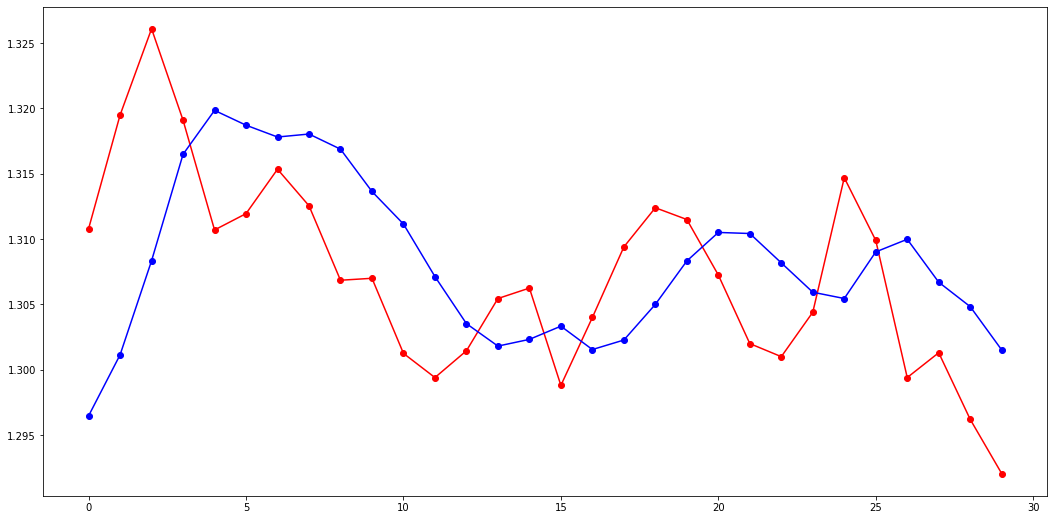

In [164]:
plt.figure(figsize=(18, 9))
plt.plot(test_data[-30:], '-ro')
plt.plot(y_hat_inversed[-30:], '-bo')
test = y_hat_inversed[-30:] - test_data[-30:]
print(test)

In [157]:
print(len(test_data))
print(len(y_hat_inversed))

1810
1780


In [158]:
y_recent = y_hat_inversed[-31:]
#print(y_recent)
y_recent2 = scaler.fit_transform(y_recent)
recent_generator = TimeseriesGenerator(y_recent2, y_recent2, length=30, batch_size=1)
for i in recent_generator:
    print(i)
# recent_hat = model.predict(recent_generator)
# recent_hat_inversed = scaler.inverse_transform(recent_hat)
# print(recent_hat_inversed)

(array([[[0.        ],
        [0.08789825],
        [0.27014542],
        [0.55101013],
        [0.8688965 ],
        [1.        ],
        [0.95578384],
        [0.9204979 ],
        [0.92938995],
        [0.884243  ],
        [0.7578087 ],
        [0.66065216],
        [0.50369644],
        [0.3631668 ],
        [0.29615402],
        [0.31620026],
        [0.35563278],
        [0.28583527],
        [0.3142357 ],
        [0.42076874],
        [0.5503502 ],
        [0.63555145],
        [0.6323204 ],
        [0.54465866],
        [0.45703888],
        [0.43820572],
        [0.5774231 ],
        [0.6151314 ],
        [0.4869423 ],
        [0.4140129 ]]], dtype=float32), array([[0.28468704]], dtype=float32))


In [149]:
y_hat_inversed = np.append(y_hat_inversed, recent_hat_inversed)
print(y_hat_inversed)

[1.5417317 1.5406266 1.5389762 ... 1.3048306 1.301515  1.3068799]


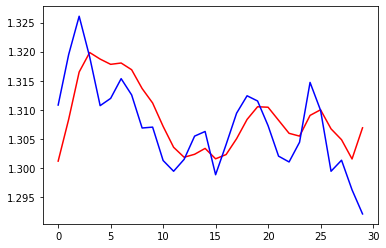

In [153]:
plt.plot(y_hat_inversed[-30:], '-r')
plt.plot(test_data[-30:], '-b')